In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import librosa
import librosa.display

# to play the audio files
from IPython.display import Audio


from keras.callbacks import ModelCheckpoint
from keras.callbacks import LearningRateScheduler
import tensorflow as tf

from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from collections.abc import Iterable

from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, BatchNormalization
from keras import layers, callbacks

In [3]:
Root_dir = 'Data'

Crema_path = Root_dir + "/Crema/" 
Ravdess_path = Root_dir + "/Ravdess/audio_speech_actors_01-24/"
Savee_path = Root_dir + "/Savee/"
Tess_path = Root_dir + "/Tess/"

Crema_dir_list = os.listdir(Crema_path)
Ravdess_dir_list = os.listdir(Ravdess_path)
Savee_dir_list = os.listdir(Savee_path)
Tess_dir_list = os.listdir(Tess_path)

In [4]:
Ex_Crema_dir_list = Crema_dir_list[:15]
Ex_Crema_dir_list

['1001_DFA_ANG_XX.wav',
 '1001_DFA_DIS_XX.wav',
 '1001_DFA_FEA_XX.wav',
 '1001_DFA_HAP_XX.wav',
 '1001_DFA_NEU_XX.wav',
 '1001_DFA_SAD_XX.wav',
 '1001_IEO_ANG_HI.wav',
 '1001_IEO_ANG_LO.wav',
 '1001_IEO_ANG_MD.wav',
 '1001_IEO_DIS_HI.wav',
 '1001_IEO_DIS_LO.wav',
 '1001_IEO_DIS_MD.wav',
 '1001_IEO_FEA_HI.wav',
 '1001_IEO_FEA_LO.wav',
 '1001_IEO_FEA_MD.wav']

In [5]:
emotions_crema = []
paths_crema = []

for it in Crema_dir_list:
    # storing file paths
    paths_crema.append(Crema_path + it)
    # storing file emotions
    part = it.split('_')
    if part[2] == 'SAD':
        emotions_crema.append('sad')
    elif part[2] == 'ANG':
        emotions_crema.append('angry')
    elif part[2] == 'DIS':
        emotions_crema.append('disgust')
    elif part[2] == 'FEA':
        emotions_crema.append('fear')
    elif part[2] == 'HAP':
        emotions_crema.append('happy')
    elif part[2] == 'NEU':
        emotions_crema.append('neutral')
    else:
        emotions_crema.append('Unknown')
        
# dataframe for emotion of files
emotions_crema_df = pd.DataFrame(emotions_crema, columns=['Emotions'])

# dataframe for path of files.
path_crema_df = pd.DataFrame(paths_crema, columns=['Path'])
Crema_df = pd.concat([emotions_crema_df, path_crema_df], axis=1)
print(Crema_df.shape)
Crema_df.head().style.set_properties(**{'background-color': '#9490ff',
                           'color': 'black',
                           'border-color': 'black'})

(7442, 2)


In [6]:
[Crema_df["Emotions"].unique().tolist() for i in Crema_df.columns]

font1 = {'family':'Times New Roman','color':'blue','size':30}
font2 = {'family':'Times New Roman','color':'blue','size':20}
font3 = {'family':'Times New Roman','color':'blue','size':10}

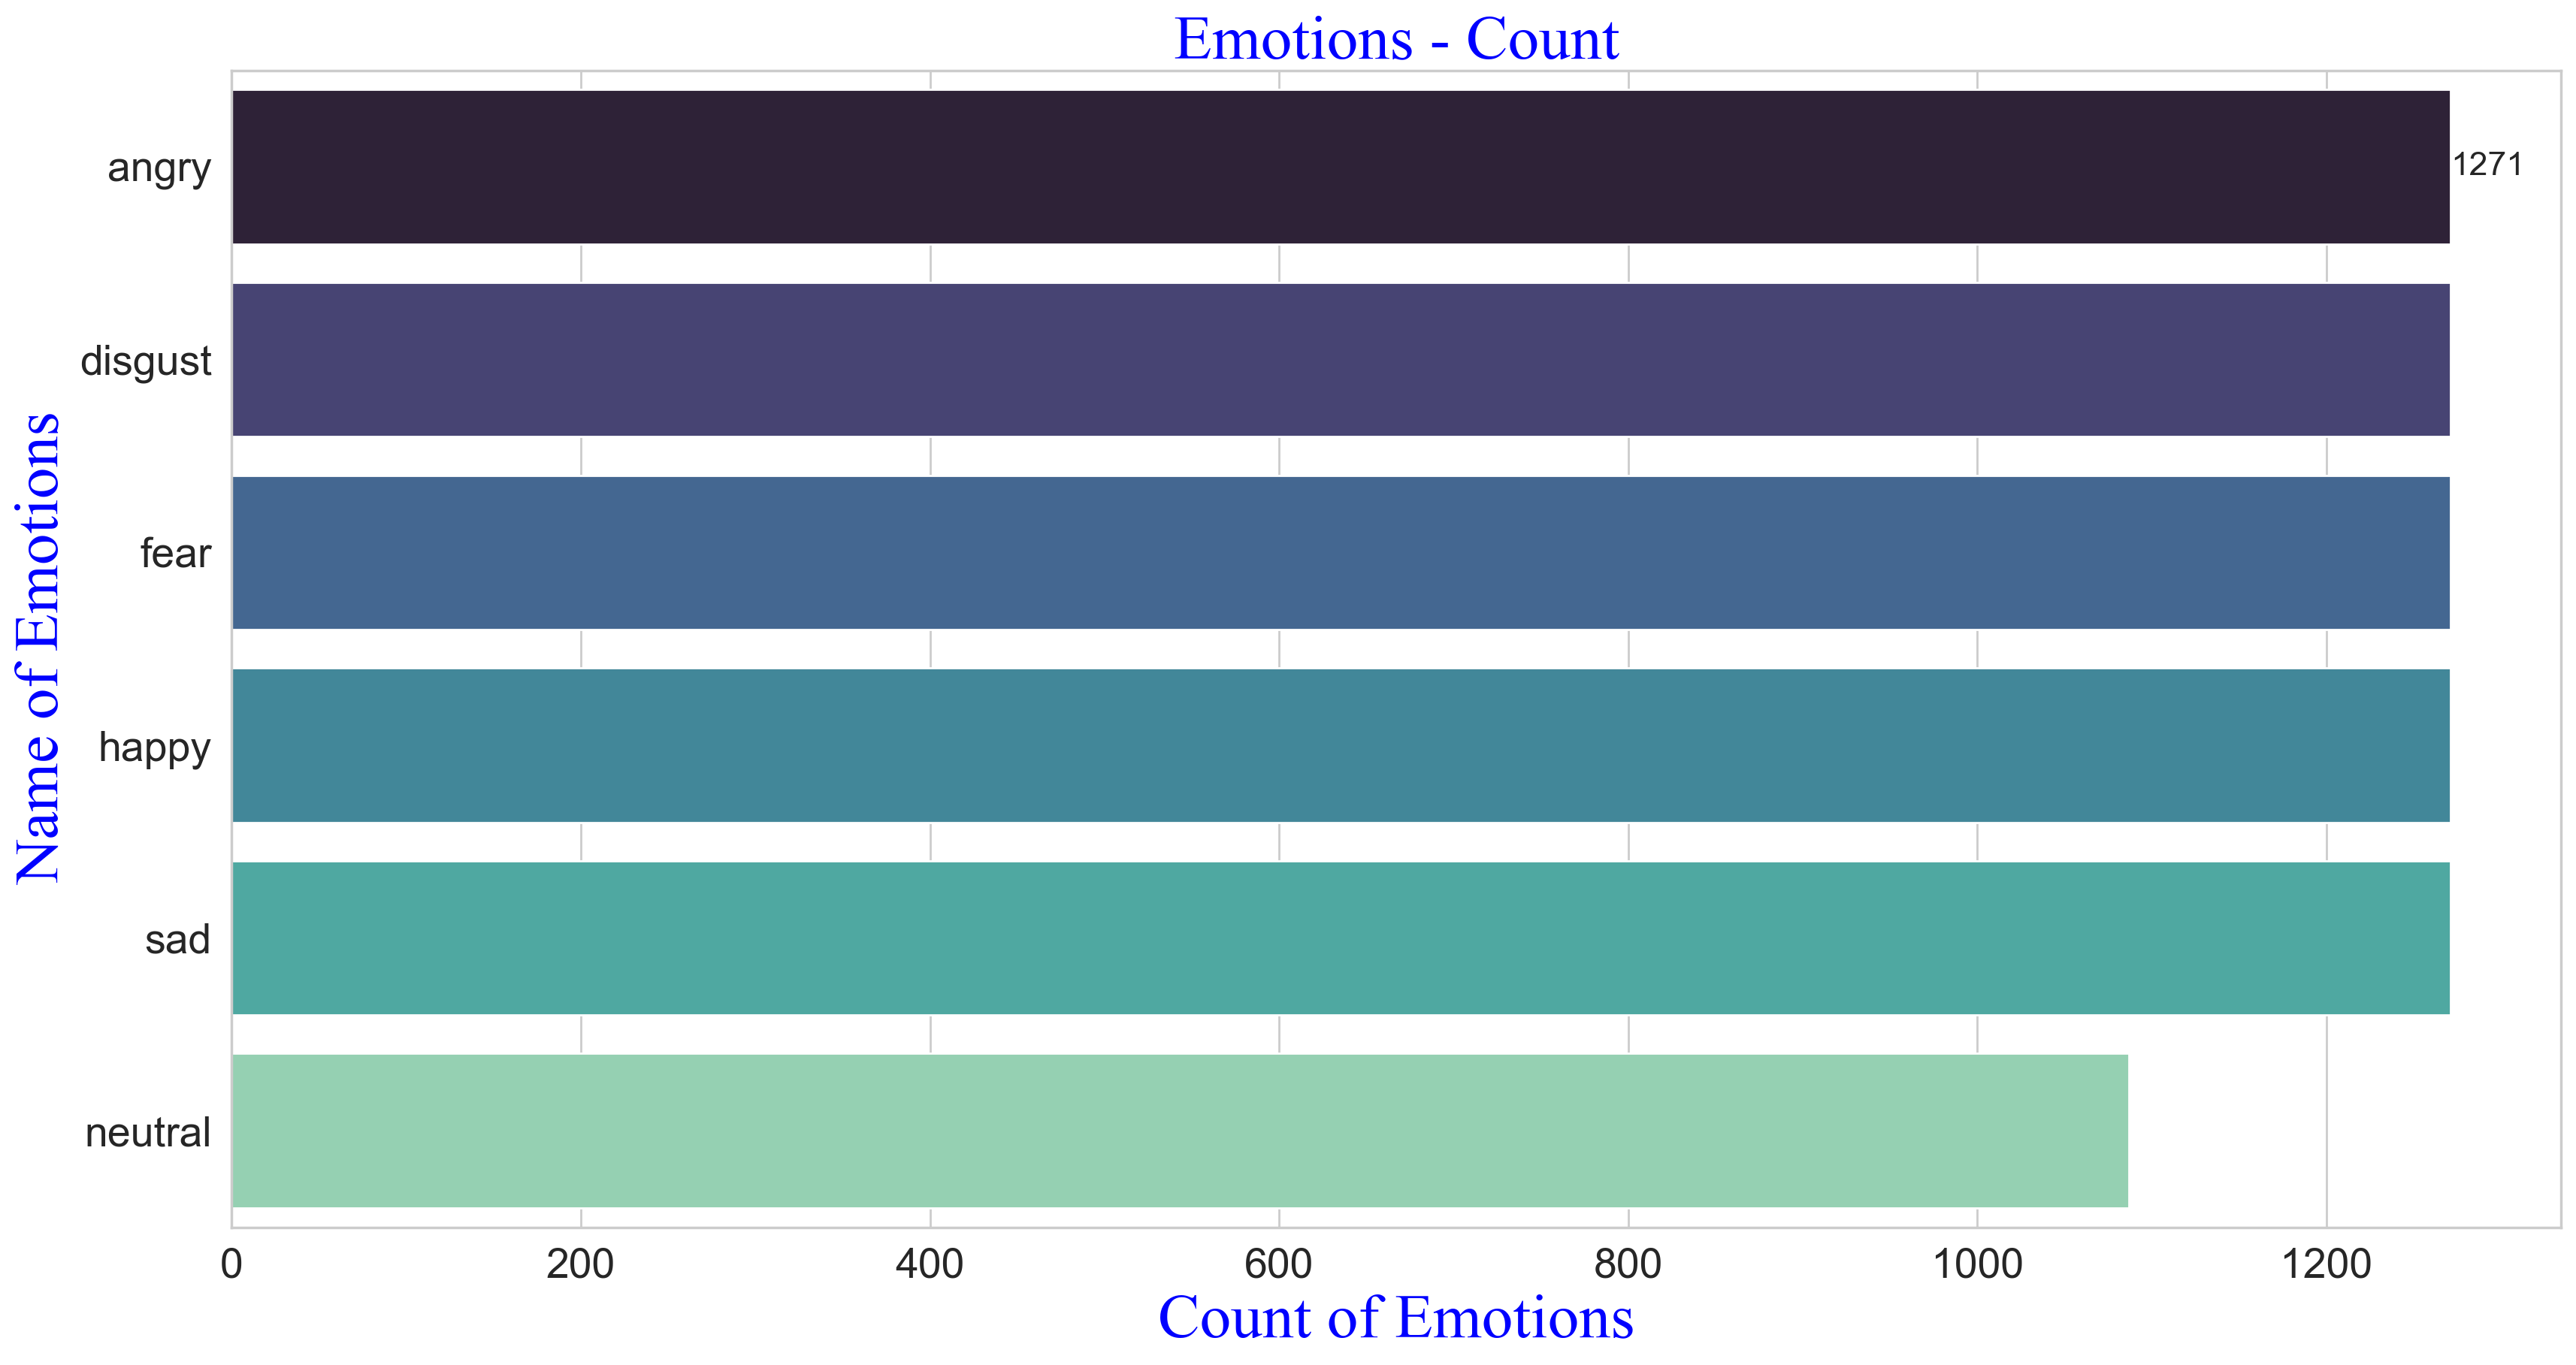

In [7]:
sns.set(style="whitegrid", color_codes=True)
plt.figure(figsize=(20,10),dpi=200)
Count_emotion = Crema_df['Emotions'].value_counts()[:]
ax = sns.barplot(x= Count_emotion, y= Count_emotion.index, palette="mako")
ax.bar_label(ax.containers[0],fontsize=16)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel("Name of Emotions", fontdict= font1)
plt.xlabel("Count of Emotions", fontdict= font1)
plt.title("Emotions - Count", fontdict= font1)
plt.show()

In [8]:
Ex_Ravdess_dir_list = Ravdess_dir_list[:15]
Ex_Ravdess_dir_list

['Actor_01',
 'Actor_02',
 'Actor_03',
 'Actor_04',
 'Actor_05',
 'Actor_06',
 'Actor_07',
 'Actor_08',
 'Actor_09',
 'Actor_10',
 'Actor_11',
 'Actor_12',
 'Actor_13',
 'Actor_14',
 'Actor_15']

In [9]:
emotions_ravdess = []
path_ravdess = []

for it in Ravdess_dir_list:
    # There are 20 actors  
    actor = os.listdir(Ravdess_path + it)
    for file in actor:
        part = file.split('.')[0]
        part = part.split('-')
        # third part in each file represents the emotion associated to that file.
        emotions_ravdess.append(int(part[2]))
        path_ravdess.append(Ravdess_path + it + '/' + file)
    
    
emotion_ravdess_df = pd.DataFrame(emotions_ravdess, columns=['Emotions'])

path_ravdess_df = pd.DataFrame(path_ravdess, columns=['Path'])
Ravdess_df = pd.concat([emotion_ravdess_df, path_ravdess_df], axis=1)

# changing integers to actual emotions.
Ravdess_df.Emotions.replace({1:'neutral', 2:'calm',
                             3:'happy', 4:'sad', 5:'angry',
                             6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)
Ravdess_df.head().style.set_properties(**{'background-color': '#9490ff',
                           'color': 'black',
                           'border-color': 'black'})

In [10]:
[Ravdess_df["Emotions"].unique().tolist() for i in Ravdess_df.columns]

[['neutral', 'calm', 'happy', 'sad', 'angry', 'fear', 'disgust', 'surprise'],
 ['neutral', 'calm', 'happy', 'sad', 'angry', 'fear', 'disgust', 'surprise']]

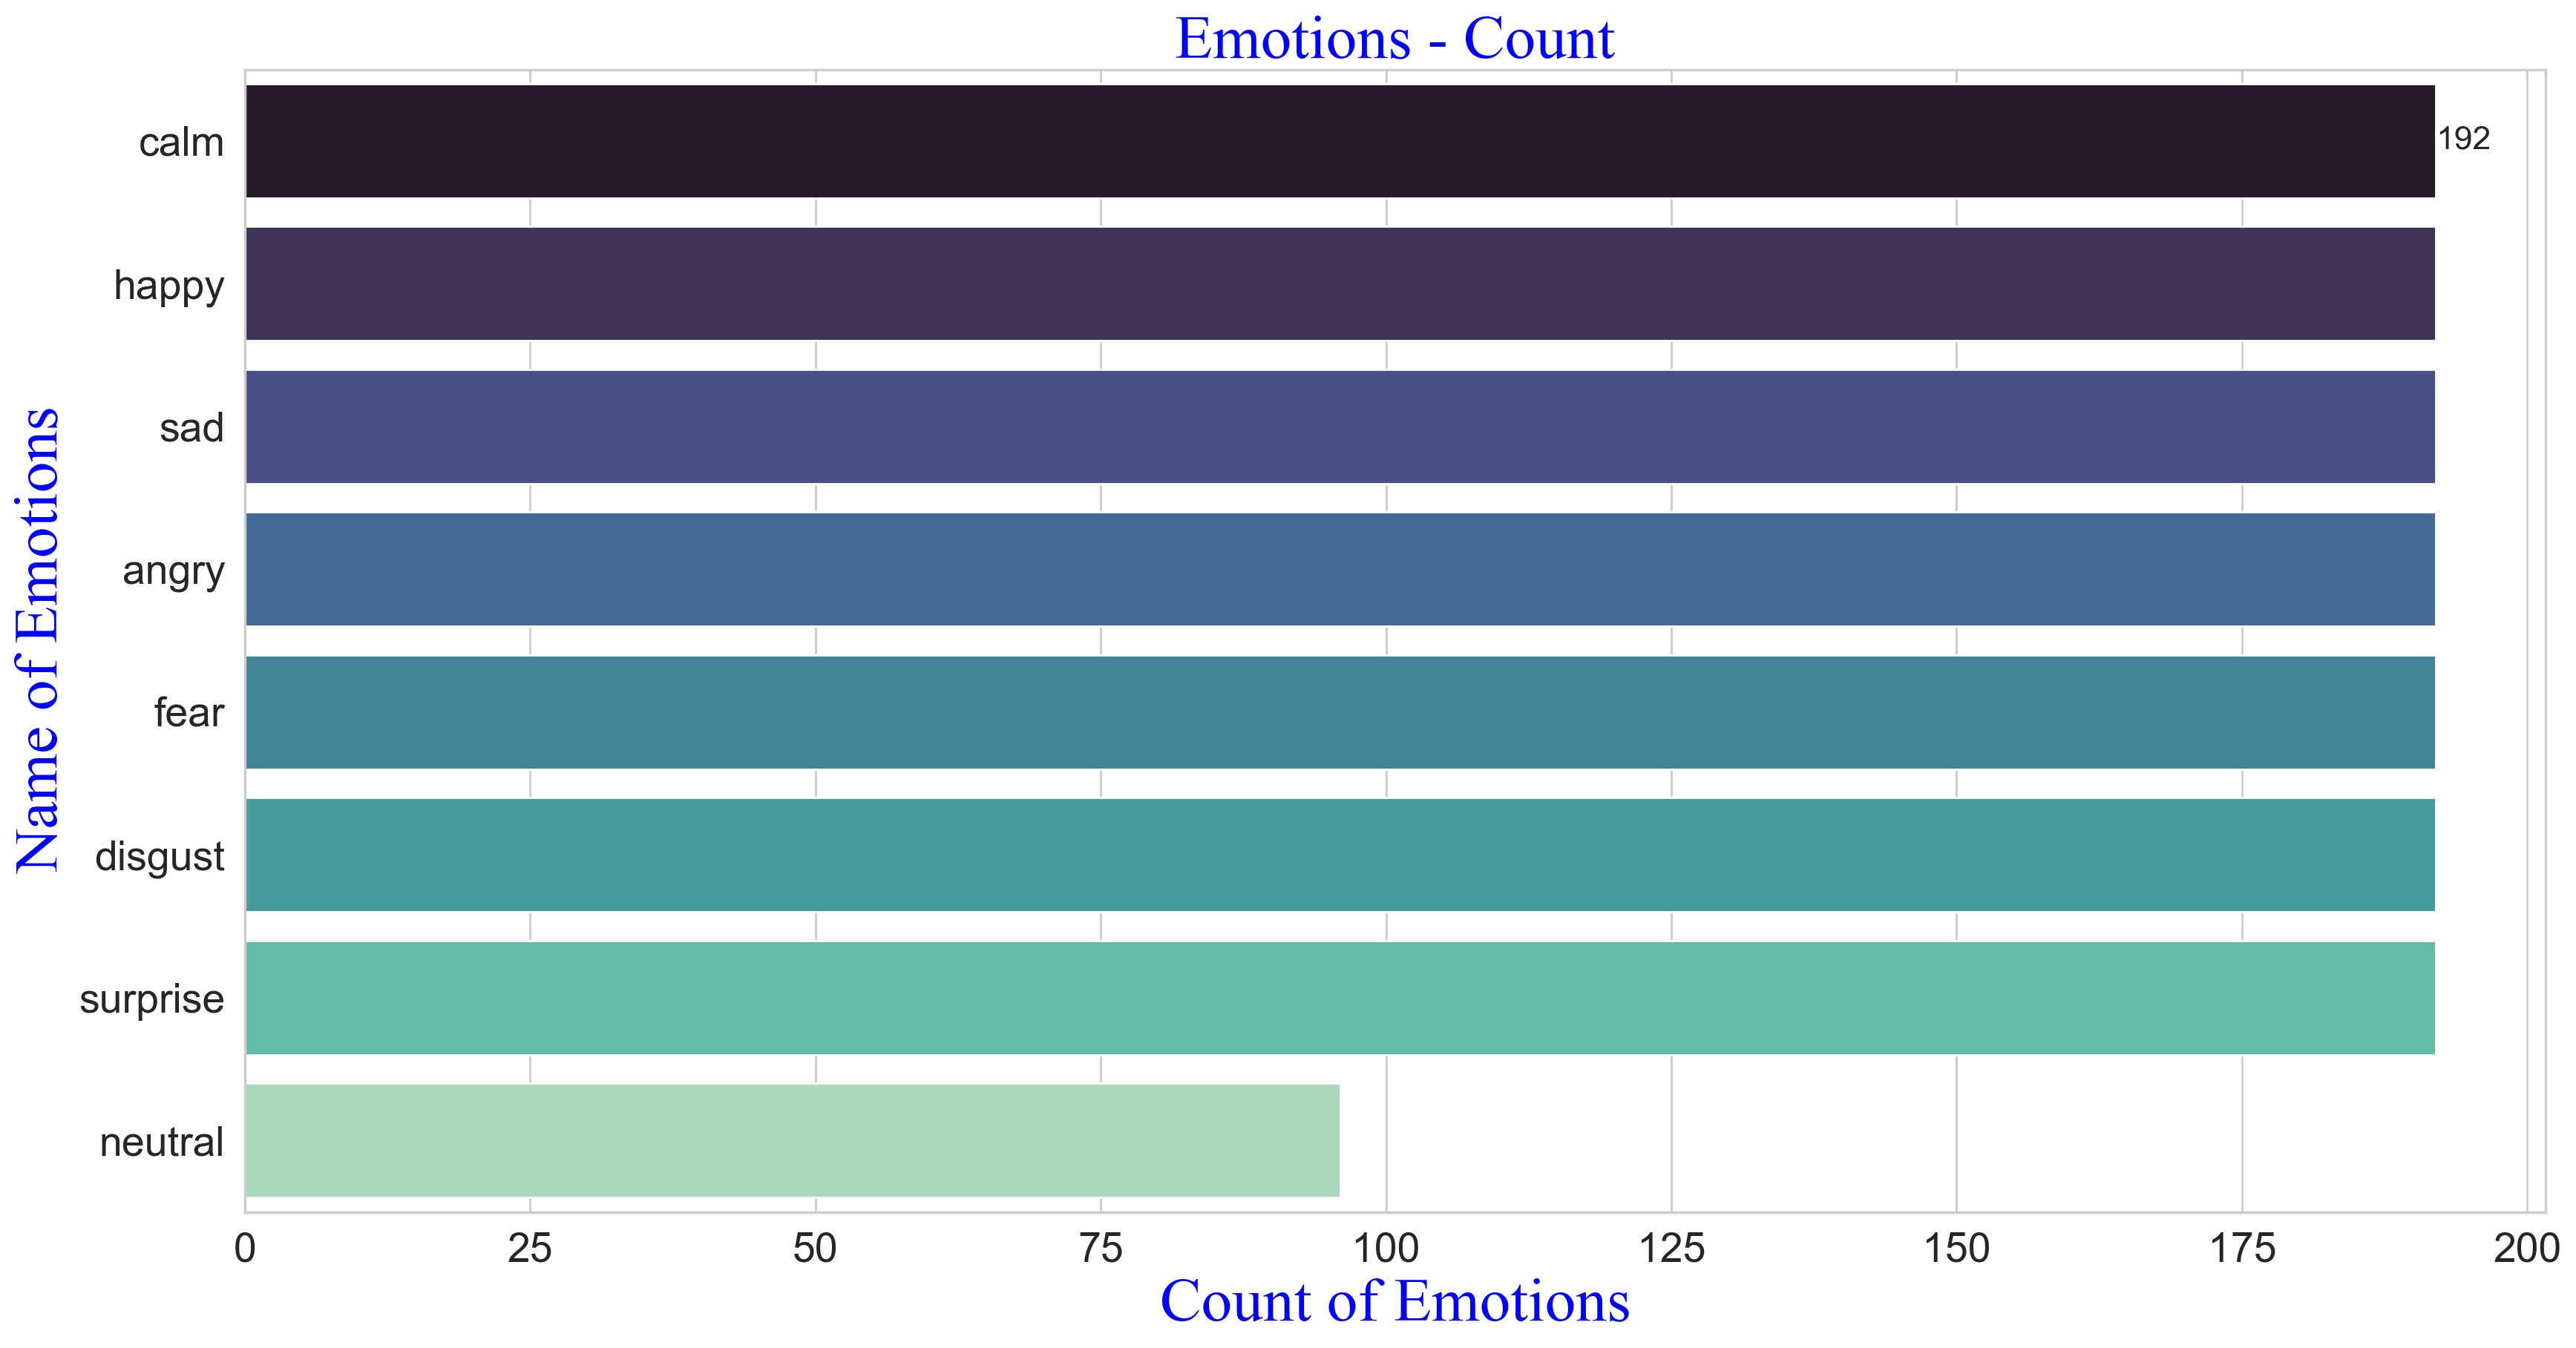

In [11]:
sns.set(style="whitegrid", color_codes=True)
plt.figure(figsize=(20,10),dpi=200)
Count_emotion = Ravdess_df['Emotions'].value_counts()[:]
ax = sns.barplot(x= Count_emotion, y= Count_emotion.index, palette="mako")
ax.bar_label(ax.containers[0],fontsize=16)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel("Name of Emotions", fontdict= font1)
plt.xlabel("Count of Emotions", fontdict= font1)
plt.title("Emotions - Count", fontdict= font1)
plt.show()

In [12]:
Ex_Savee_dir_list = Savee_dir_list[:15]
Ex_Savee_dir_list

['DC_a01.wav',
 'DC_a02.wav',
 'DC_a03.wav',
 'DC_a04.wav',
 'DC_a05.wav',
 'DC_a06.wav',
 'DC_a07.wav',
 'DC_a08.wav',
 'DC_a09.wav',
 'DC_a10.wav',
 'DC_a11.wav',
 'DC_a12.wav',
 'DC_a13.wav',
 'DC_a14.wav',
 'DC_a15.wav']

In [13]:
emotions_savee = []
path_savee = []

for it in Savee_dir_list:
    path_savee.append(Savee_path + it)
    part = it.split('_')[1]
    part = part[:-6]
    if part == 'a':
        emotions_savee.append('angry')
    elif part == 'd':
        emotions_savee.append('disgust')
    elif part == 'f':
        emotions_savee.append('fear')
    elif part == 'h':
        emotions_savee.append('happiness')
    elif part == 'n':
        emotions_savee.append('neutral')
    elif part == 'sa':
        emotions_savee.append('sadness')
    elif part == 'su':
        emotions_savee.append('surprise')
        
    else:
        emotions_savee.append('Unknown')
        
# dataframe for emotion of files
emotion_savee_df = pd.DataFrame(emotions_savee, columns=['Emotions'])

# dataframe for path of files.
path_savee_df = pd.DataFrame(path_savee, columns=['Path'])
Savee_df = pd.concat([emotion_savee_df, path_savee_df], axis=1)
Savee_df.head().style.set_properties(**{'background-color': '#9490ff',
                           'color': 'black',
                           'border-color': 'black'})

In [14]:
[Savee_df["Emotions"].unique().tolist() for i in Savee_df.columns]

[['angry', 'disgust', 'fear', 'happiness', 'neutral', 'sadness', 'surprise'],
 ['angry', 'disgust', 'fear', 'happiness', 'neutral', 'sadness', 'surprise']]

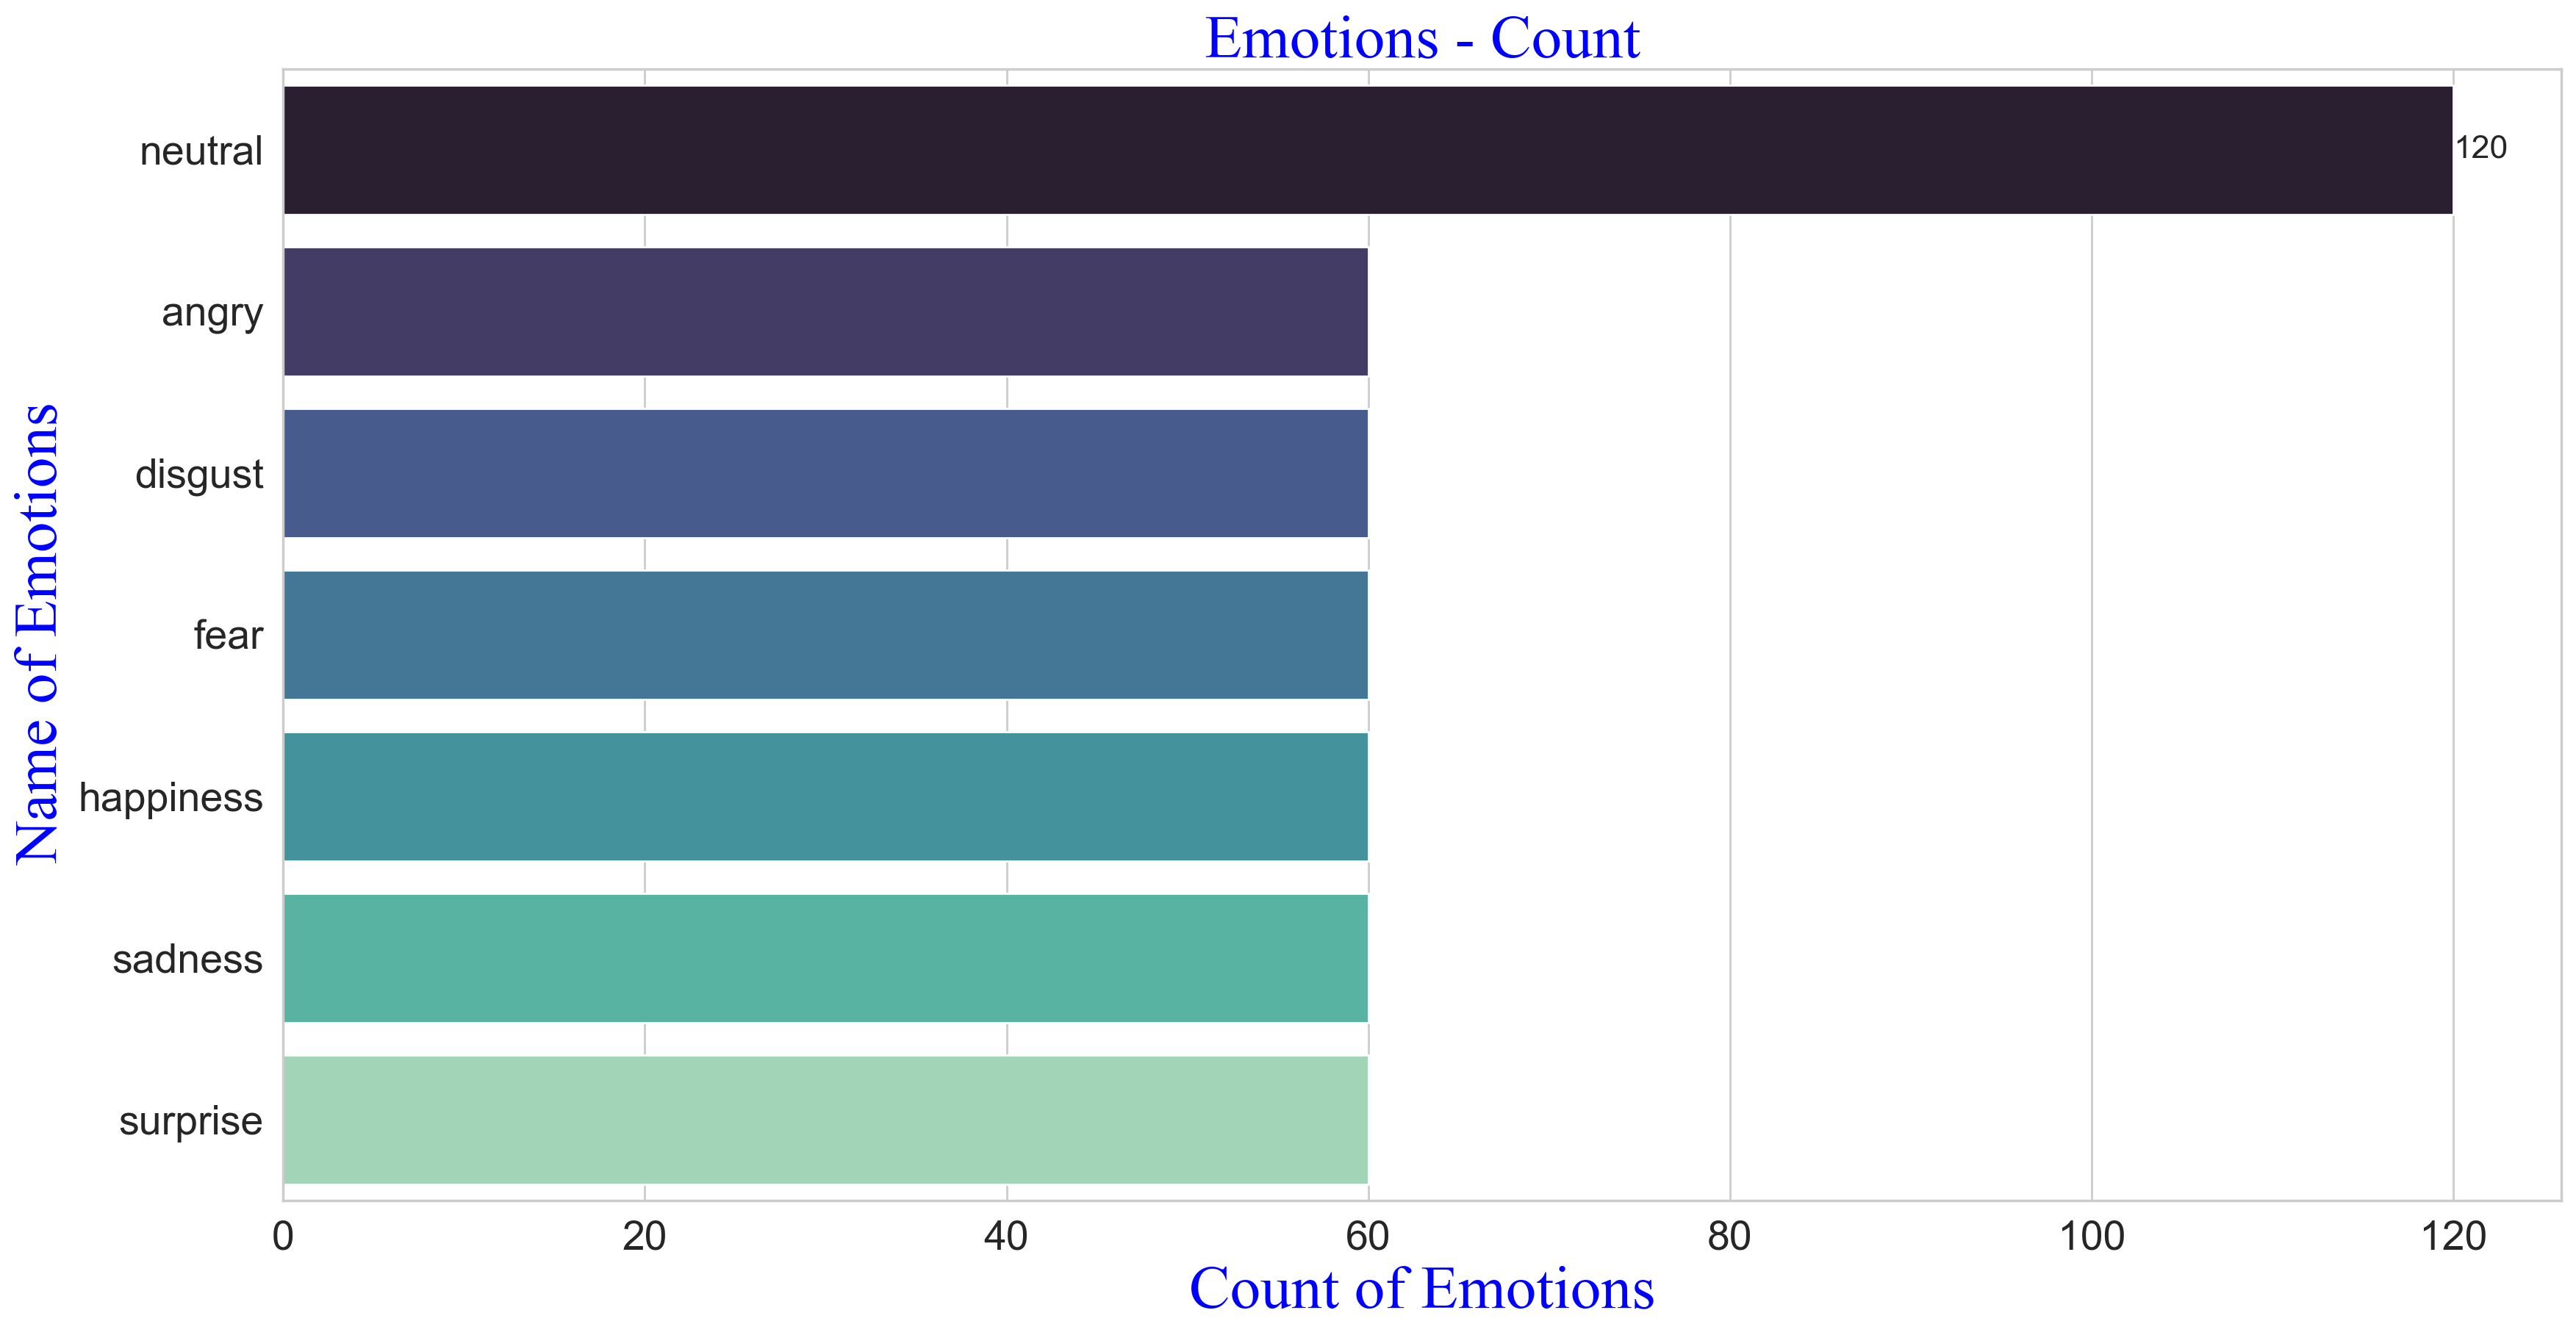

In [15]:
sns.set(style="whitegrid", color_codes=True)
plt.figure(figsize=(20,10),dpi=200)
Count_emotion = Savee_df['Emotions'].value_counts()[:]
ax = sns.barplot(x= Count_emotion, y= Count_emotion.index, palette="mako")
ax.bar_label(ax.containers[0],fontsize=16)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel("Name of Emotions", fontdict= font1)
plt.xlabel("Count of Emotions", fontdict= font1)
plt.title("Emotions - Count", fontdict= font1)
plt.show()

In [16]:
Ex_Tess_dir_list = Tess_dir_list[:15]
Ex_Tess_dir_list

['OAF_angry',
 'OAF_disgust',
 'OAF_Fear',
 'OAF_happy',
 'OAF_neutral',
 'OAF_Pleasant_surprise',
 'OAF_Sad',
 'YAF_angry',
 'YAF_disgust',
 'YAF_fear',
 'YAF_happy',
 'YAF_neutral',
 'YAF_pleasant_surprised',
 'YAF_sad']

In [17]:
emotions_tess = []
path_tess = []

for it in Tess_dir_list:
    directories = os.listdir(Tess_path + '/' + it)
    for file in directories:
        part = file.split('.')[0]
        part = part.split('_')[2]
        if part=='ps':
            emotions_tess.append('surprise')
        else:
            emotions_tess.append(part)
        path_tess.append(Tess_path + it + '/' + file)
        
        
        
# dataframe for emotion of files
emotion_tess_df = pd.DataFrame(emotions_tess, columns=['Emotions'])

# dataframe for path of files.
path_tess_df = pd.DataFrame(path_tess, columns=['Path'])
Tess_df = pd.concat([emotion_tess_df, path_tess_df], axis=1)
Tess_df.head().style.set_properties(**{'background-color': '#9490ff',
                           'color': 'black',
                           'border-color': 'black'})

In [18]:
[Tess_df["Emotions"].unique().tolist() for i in Tess_df.columns]

[['angry', 'disgust', 'fear', 'happy', 'neutral', 'surprise', 'sad'],
 ['angry', 'disgust', 'fear', 'happy', 'neutral', 'surprise', 'sad']]

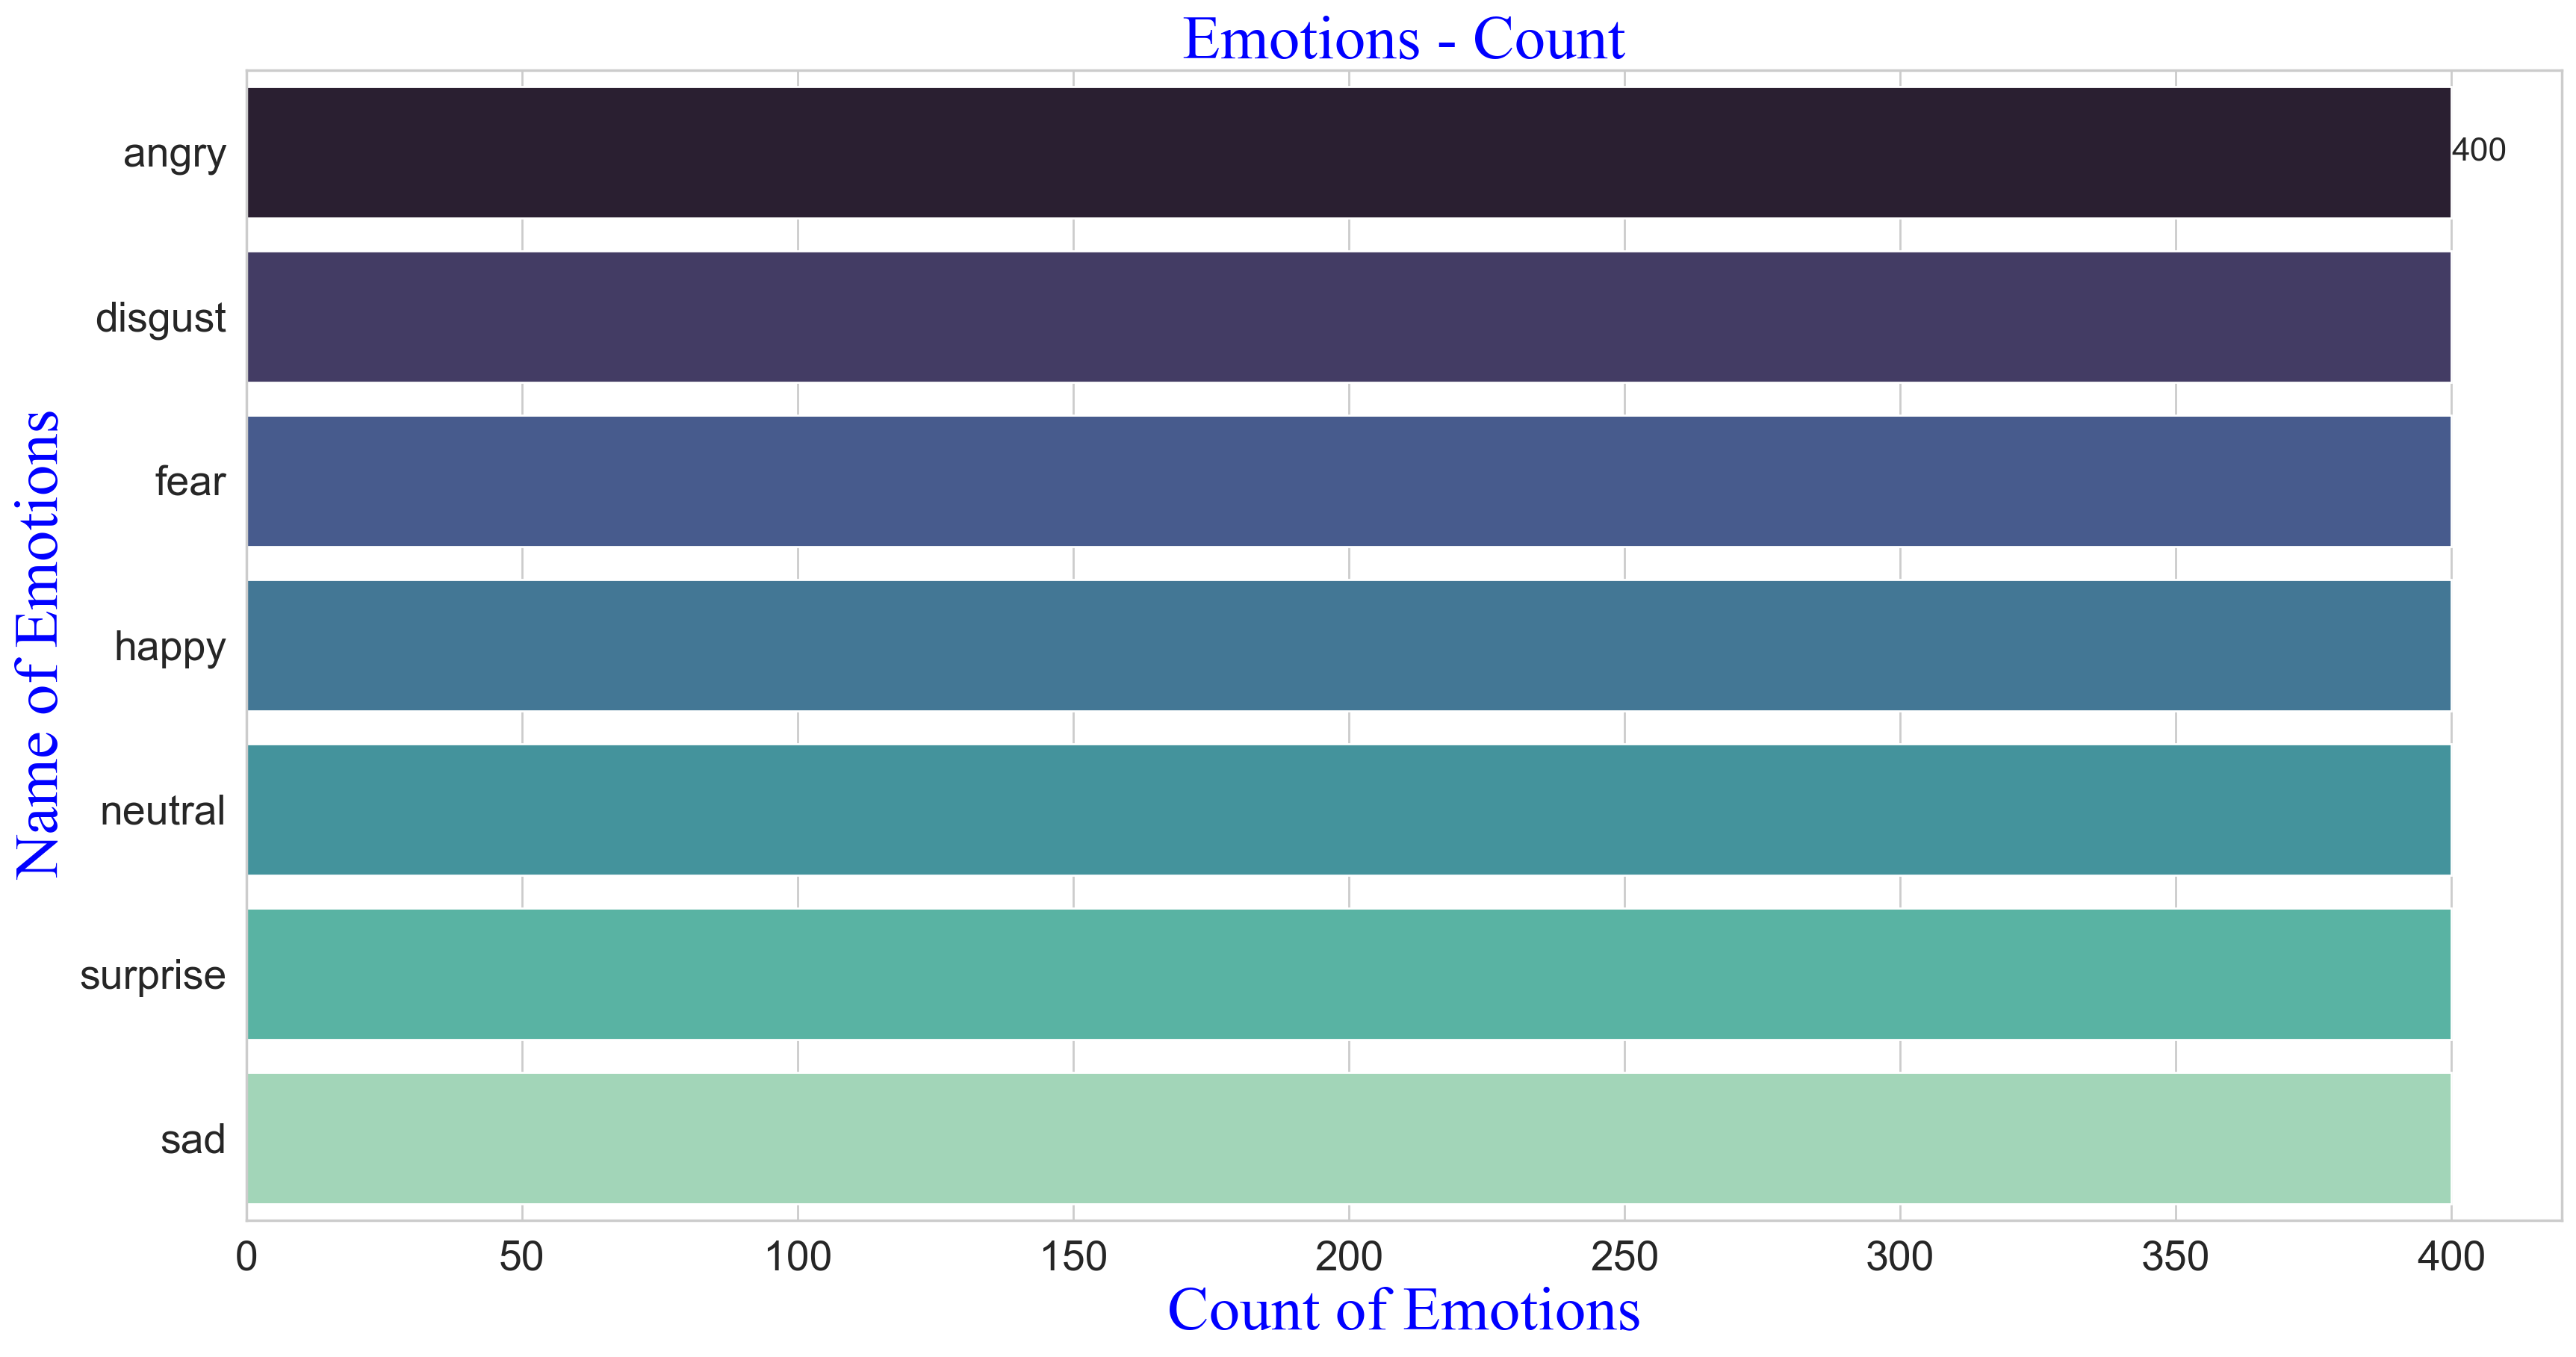

In [19]:
sns.set(style="whitegrid", color_codes=True)
plt.figure(figsize=(20,10),dpi=200)
Count_emotion = Tess_df['Emotions'].value_counts()[:]
ax = sns.barplot(x= Count_emotion, y= Count_emotion.index, palette="mako")
ax.bar_label(ax.containers[0],fontsize=16)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel("Name of Emotions", fontdict= font1)
plt.xlabel("Count of Emotions", fontdict= font1)
plt.title("Emotions - Count", fontdict= font1)
plt.show()

In [20]:
Sum_df = pd.concat([Crema_df, Ravdess_df, Savee_df, Tess_df], axis = 0)
Sum_df.to_csv("Sum_df.csv",index=False)
Sum_df.head().style.set_properties(**{'background-color': '#9490ff',
                           'color': 'black',
                           'border-color': 'black'})

In [21]:
[Sum_df["Emotions"].unique().tolist() for i in Sum_df.columns]

[['angry',
  'disgust',
  'fear',
  'happy',
  'neutral',
  'sad',
  'calm',
  'surprise',
  'happiness',
  'sadness'],
 ['angry',
  'disgust',
  'fear',
  'happy',
  'neutral',
  'sad',
  'calm',
  'surprise',
  'happiness',
  'sadness']]

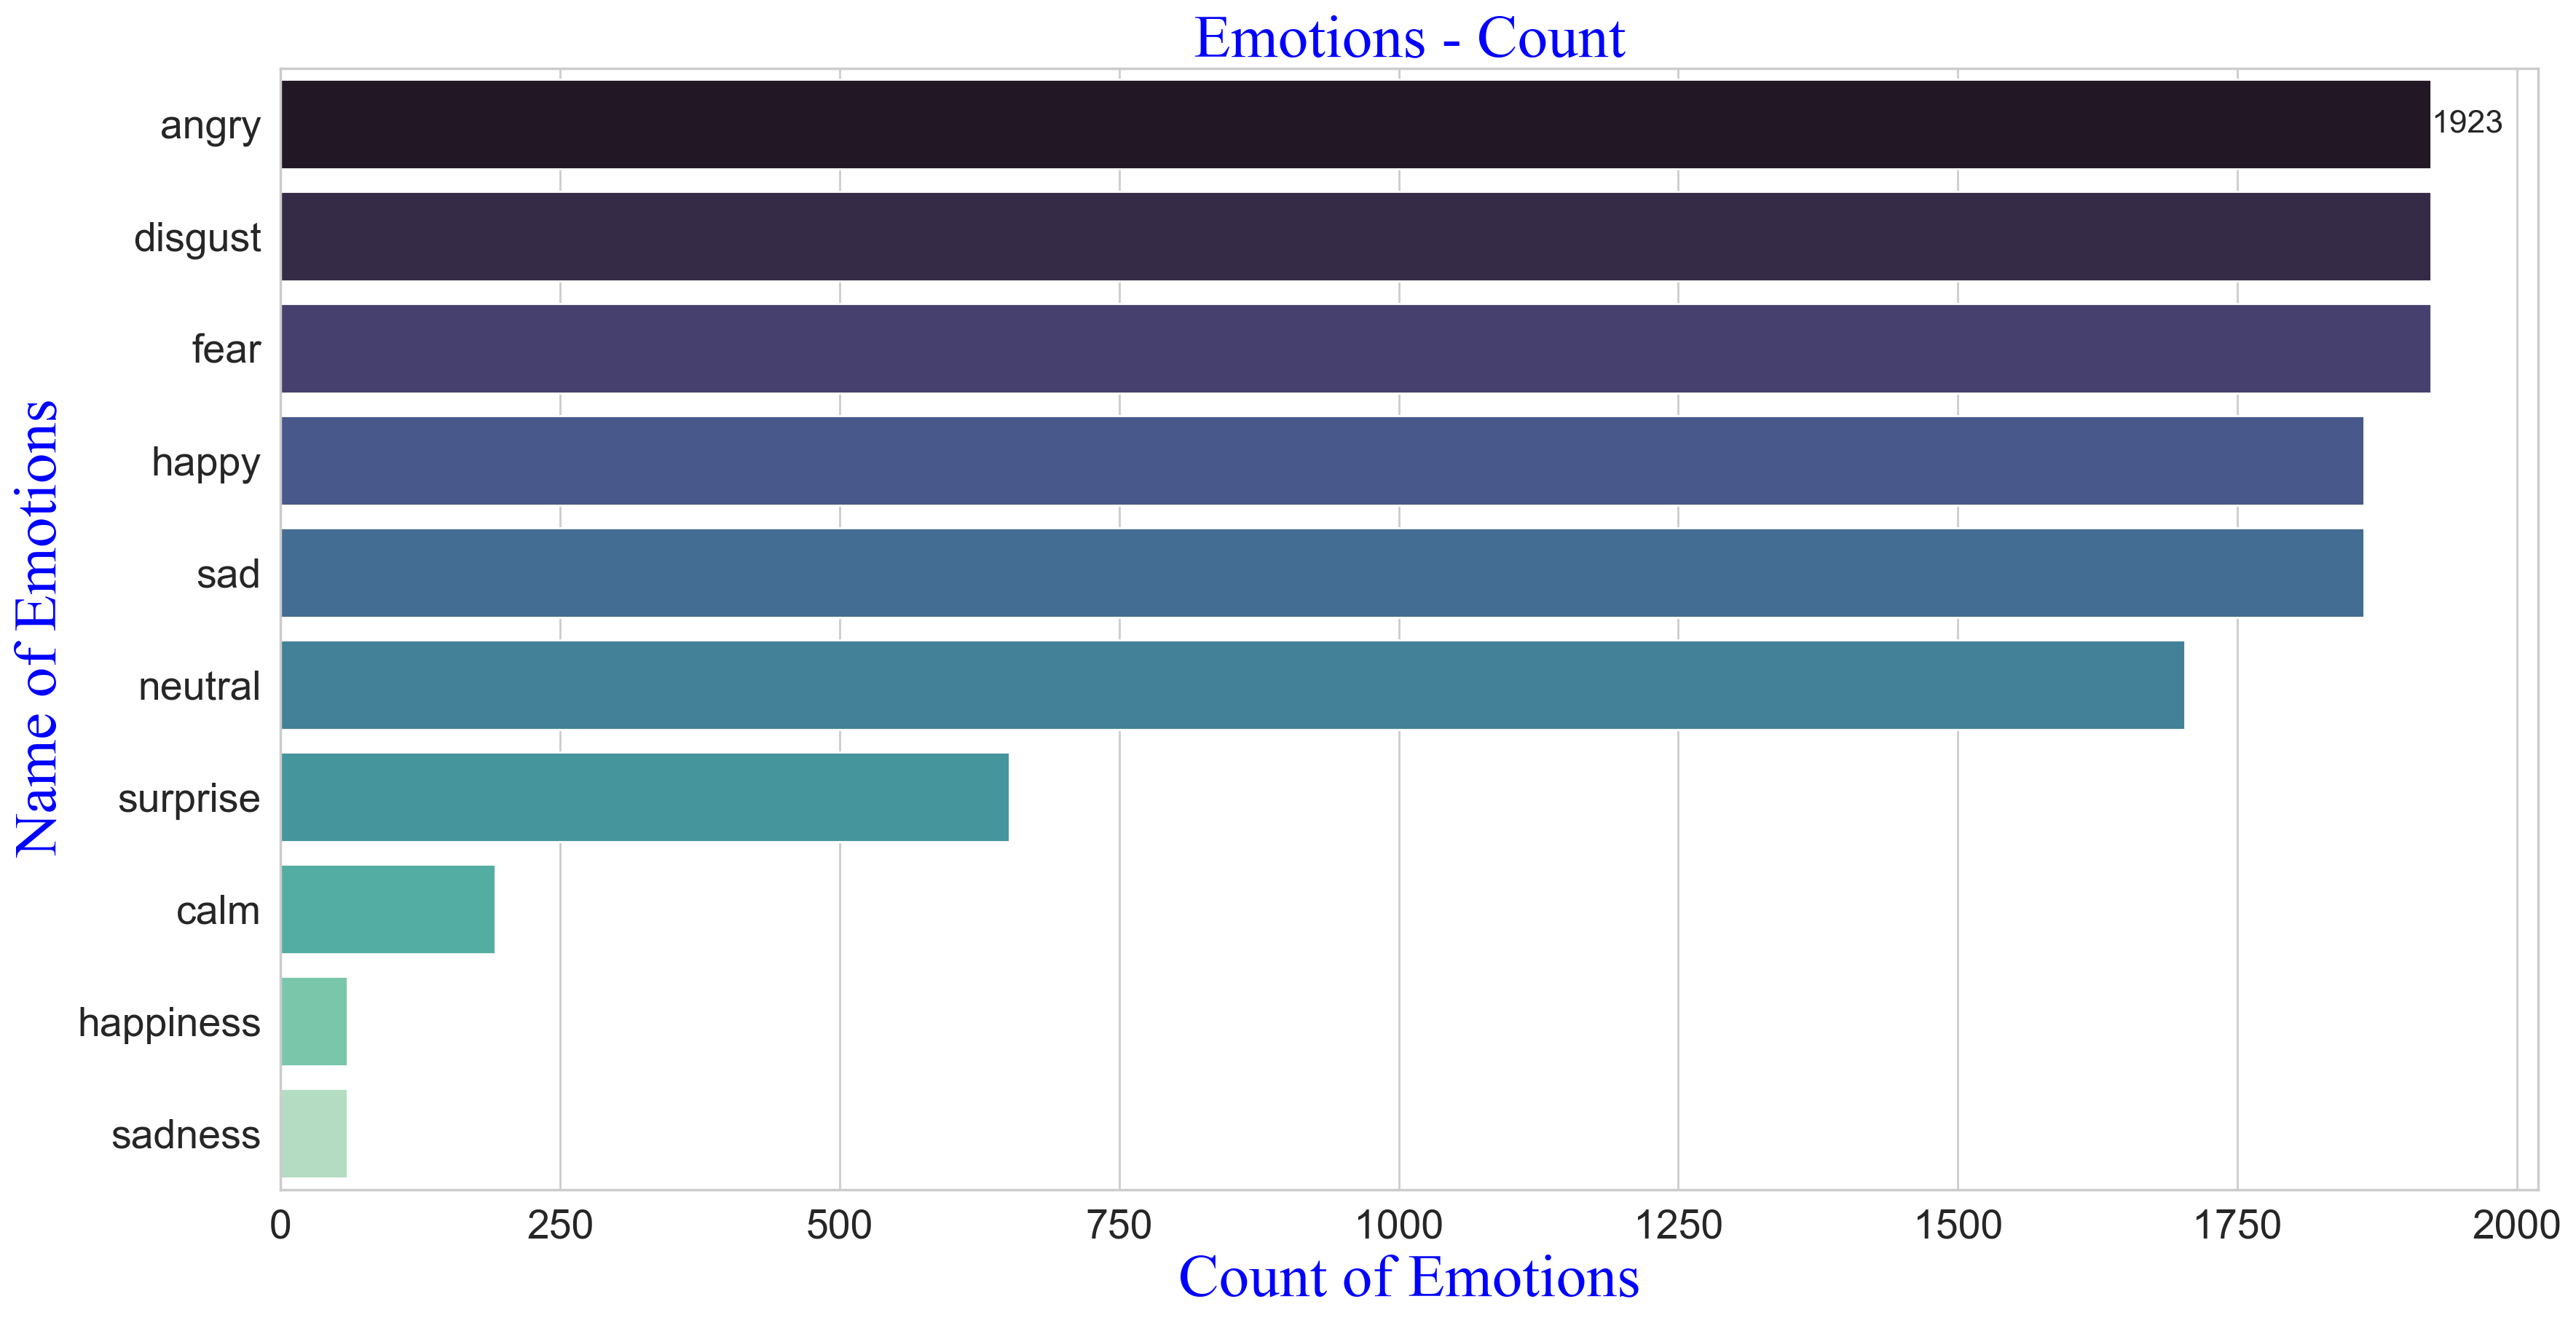

In [22]:
sns.set(style="whitegrid", color_codes=True)
plt.figure(figsize=(20,10),dpi=200)
Count_emotion = Sum_df['Emotions'].value_counts()[:]
ax = sns.barplot(x= Count_emotion, y= Count_emotion.index, palette="mako")
ax.bar_label(ax.containers[0],fontsize=16)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel("Name of Emotions", fontdict= font1)
plt.xlabel("Count of Emotions", fontdict= font1)
plt.title("Emotions - Count", fontdict= font1)
plt.show()

In [23]:
Sum_df_rep = Sum_df
Sum_df_rep['Emotions'].replace('happiness', 'happy', inplace=True)
Sum_df_rep['Emotions'].replace('sadness', 'sad', inplace=True)
Sum_df_rep['Emotions'].replace('calm', 'neutral', inplace=True)

In [24]:
[Sum_df_rep["Emotions"].unique().tolist() for i in Sum_df_rep.columns]

[['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise'],
 ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']]

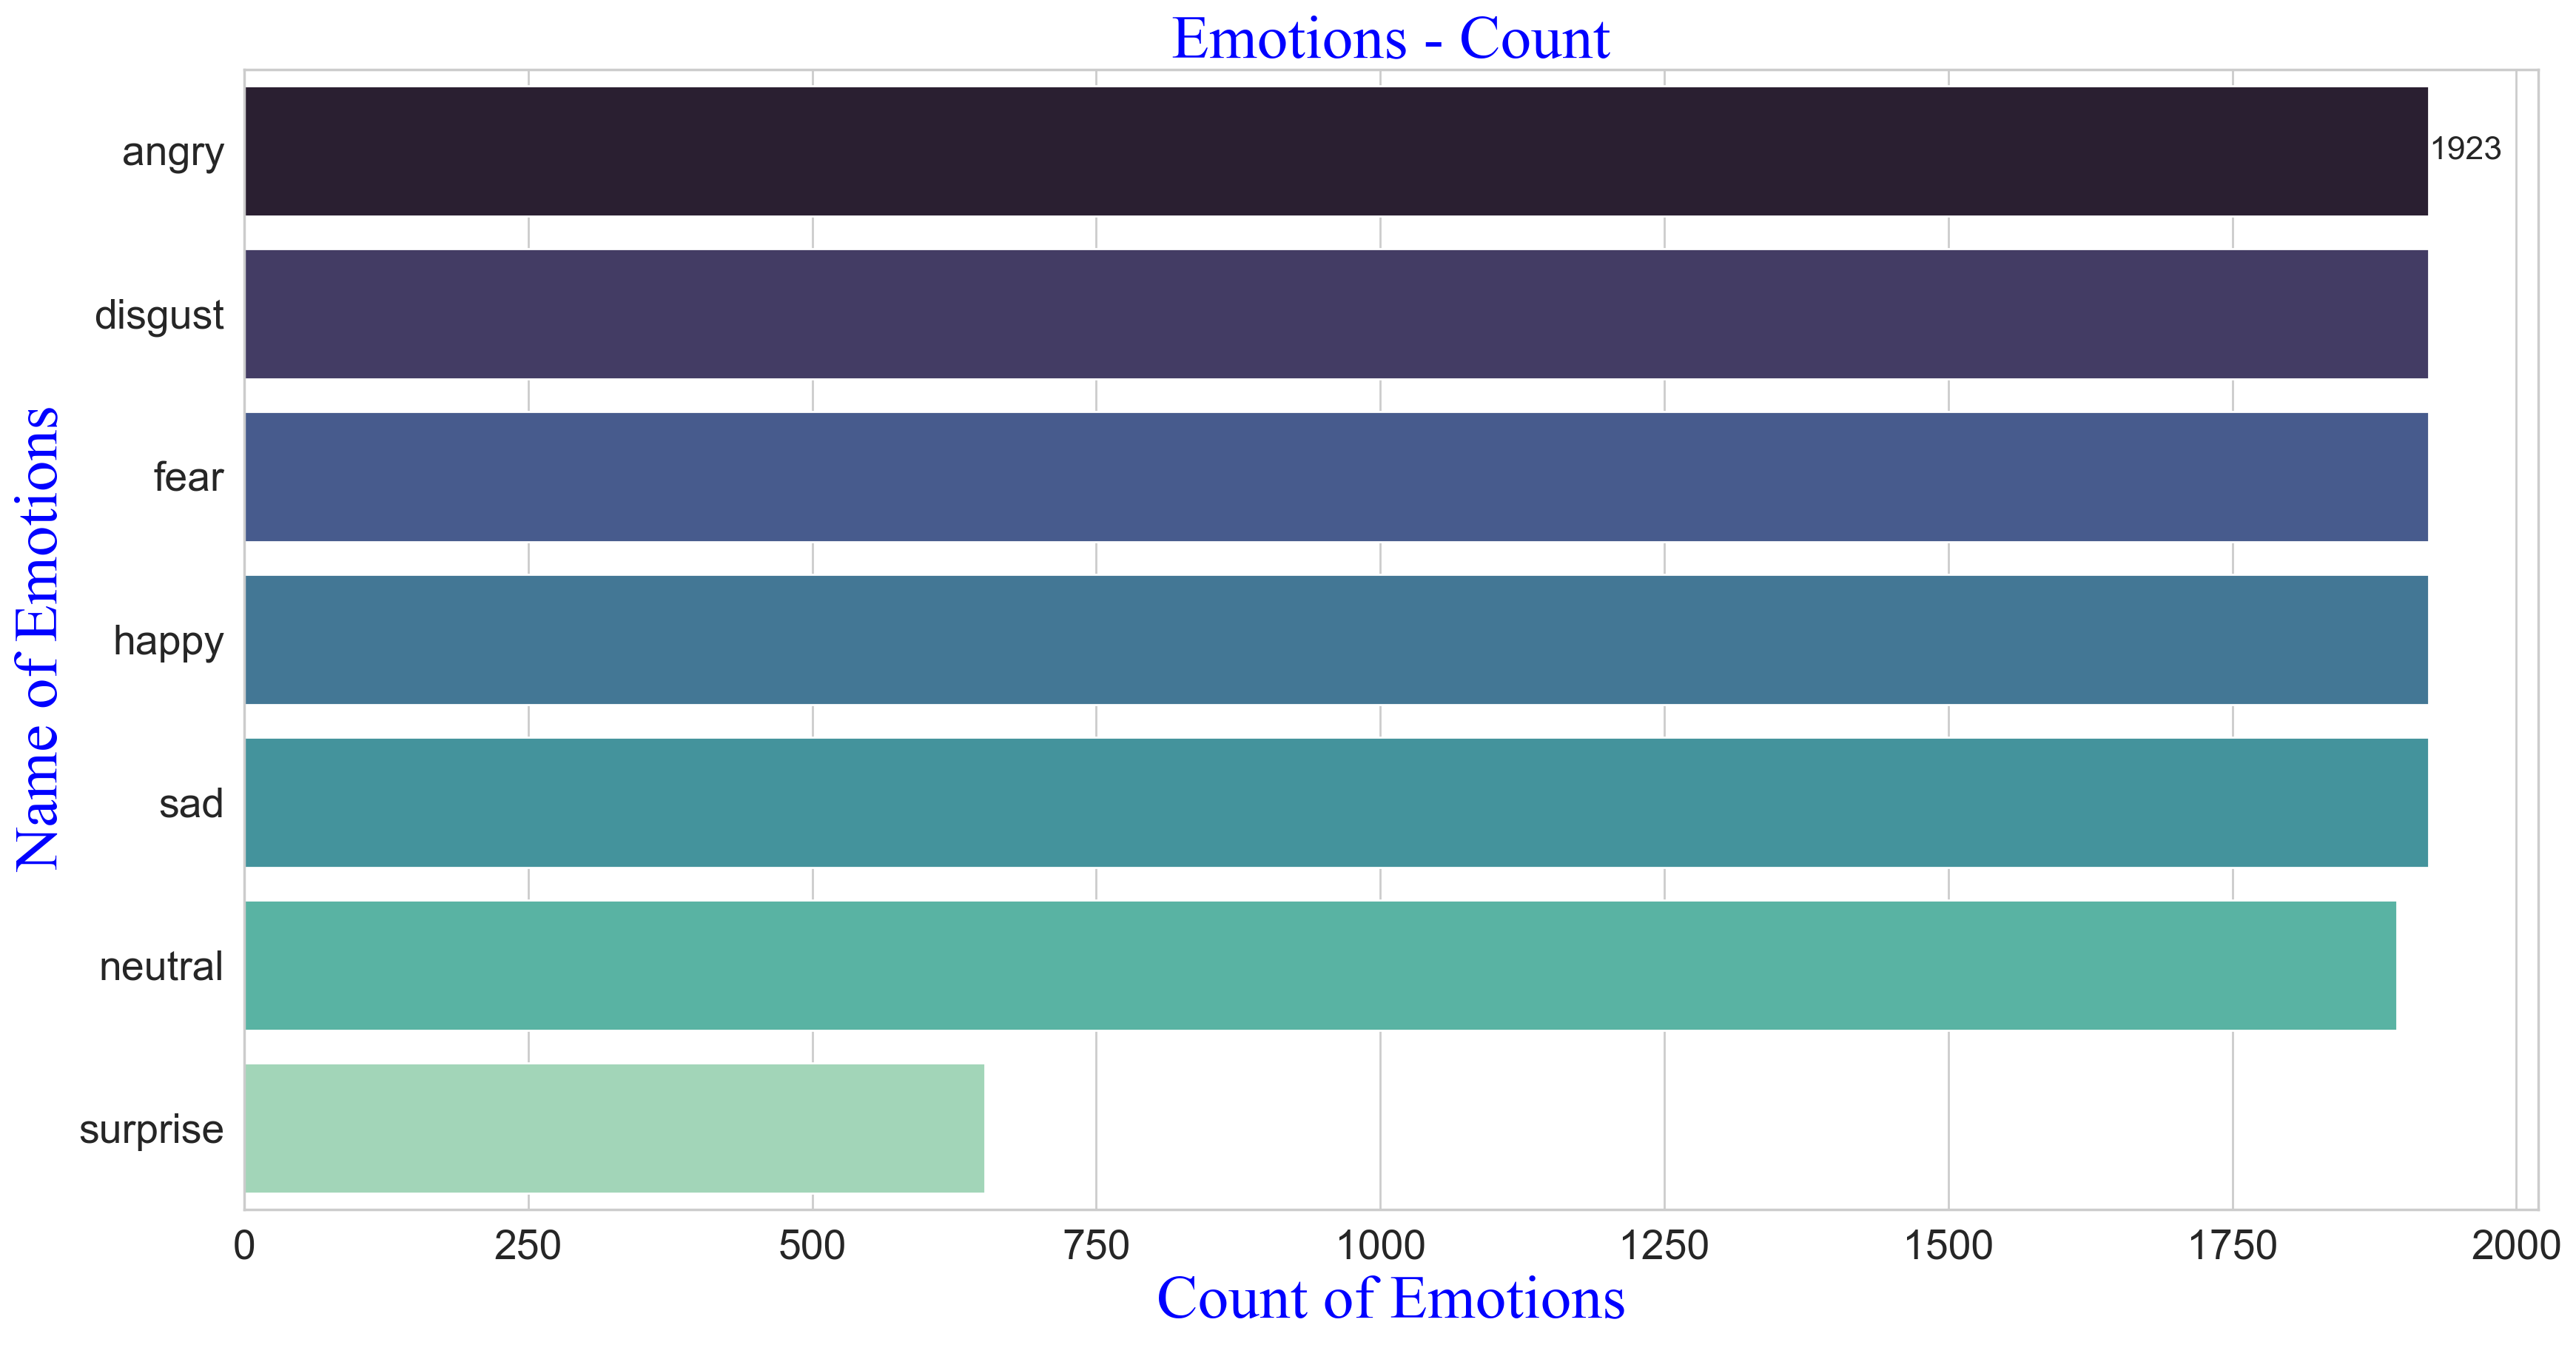

In [25]:
sns.set(style="whitegrid", color_codes=True)
plt.figure(figsize=(20,10),dpi=200)
Count_emotion = Sum_df_rep['Emotions'].value_counts()[:]
ax = sns.barplot(x= Count_emotion, y= Count_emotion.index, palette="mako")
ax.bar_label(ax.containers[0],fontsize=16)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel("Name of Emotions", fontdict= font1)
plt.xlabel("Count of Emotions", fontdict= font1)
plt.title("Emotions - Count", fontdict= font1)
plt.show()

In [26]:
%%time
audio_arrays = []

for i in Sum_df_rep['Path']:
    y, sr = librosa.load(i, sr=44100)
    audio_arrays.append(y)
    
Sum_df_rep['Arrays'] = audio_arrays

CPU times: total: 49.4 s
Wall time: 1min 17s


In [27]:
Sum_df_rep.head().style.set_properties(**{'background-color': '#9490ff',
                           'color': 'black',
                           'border-color': 'black'})

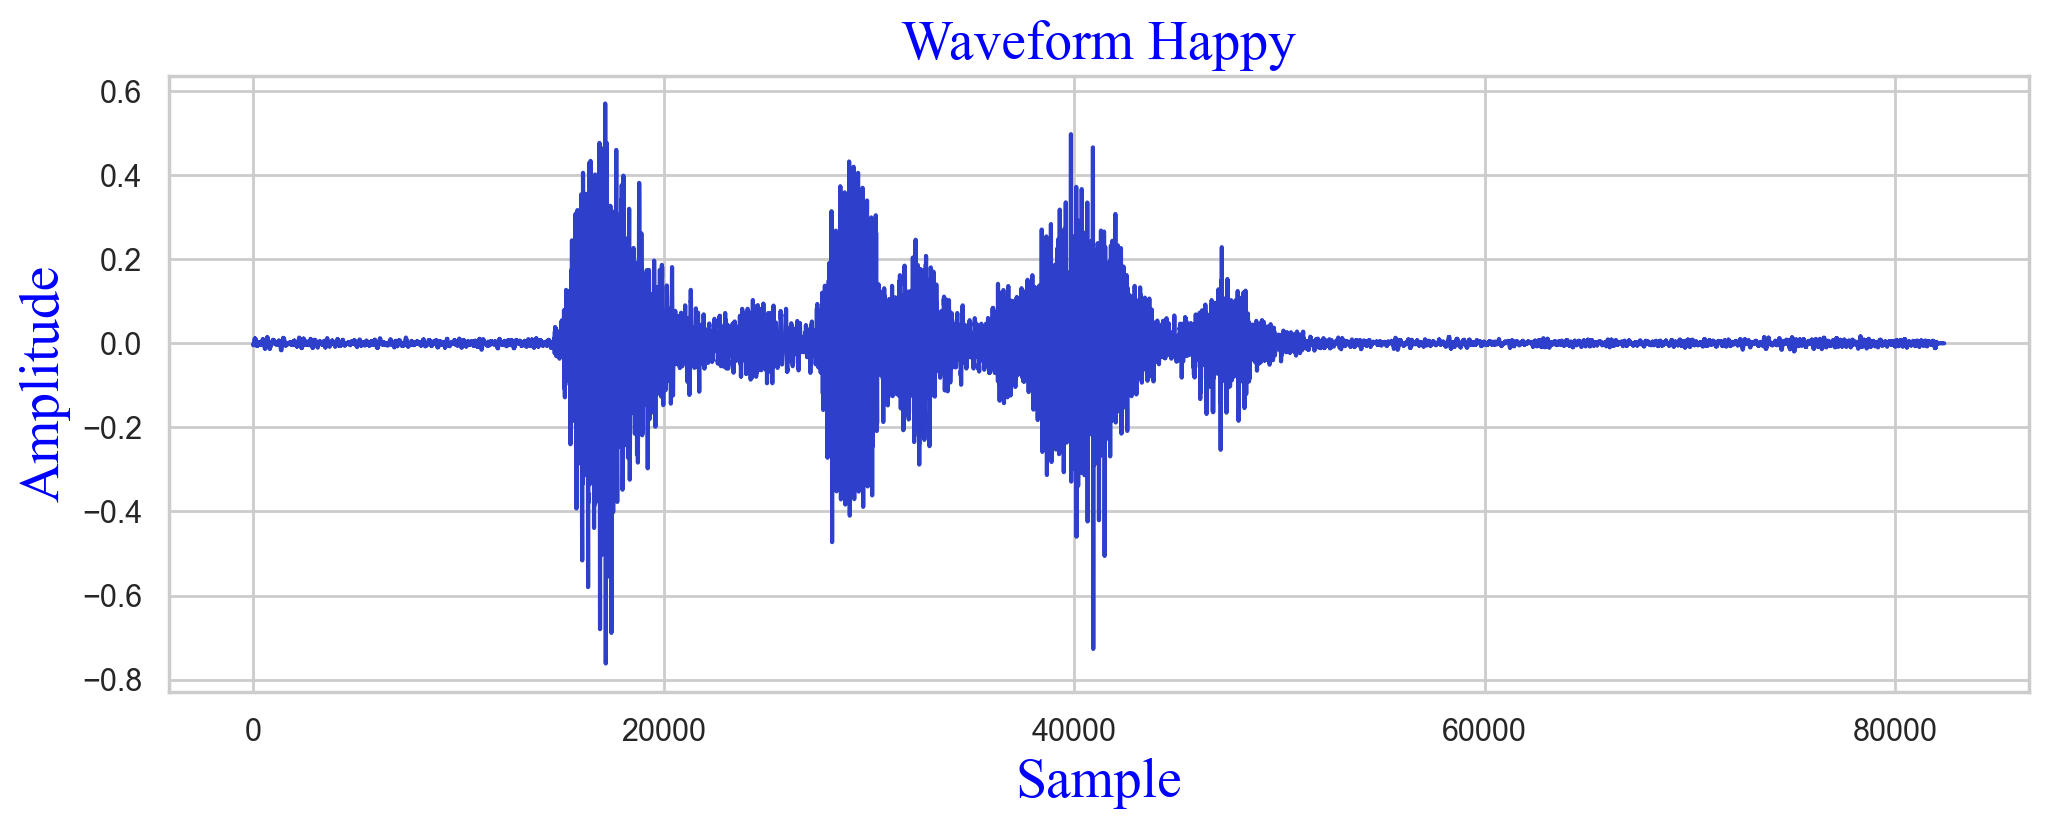

In [28]:
happy_sp = Sum_df_rep[Sum_df_rep['Emotions'] == 'happy']['Path']
happy_arr = Sum_df_rep[Sum_df_rep['Emotions'] == 'happy']['Arrays']

plt.figure(figsize=(12, 4), dpi=200)
plt.plot(happy_arr.iloc[0], color='#2E40CB')
plt.xlabel('Sample', fontdict= font2)
plt.ylabel('Amplitude', fontdict= font2)
plt.title('Waveform Happy', fontdict= font2)
plt.show()

Audio(happy_sp.iloc[0])

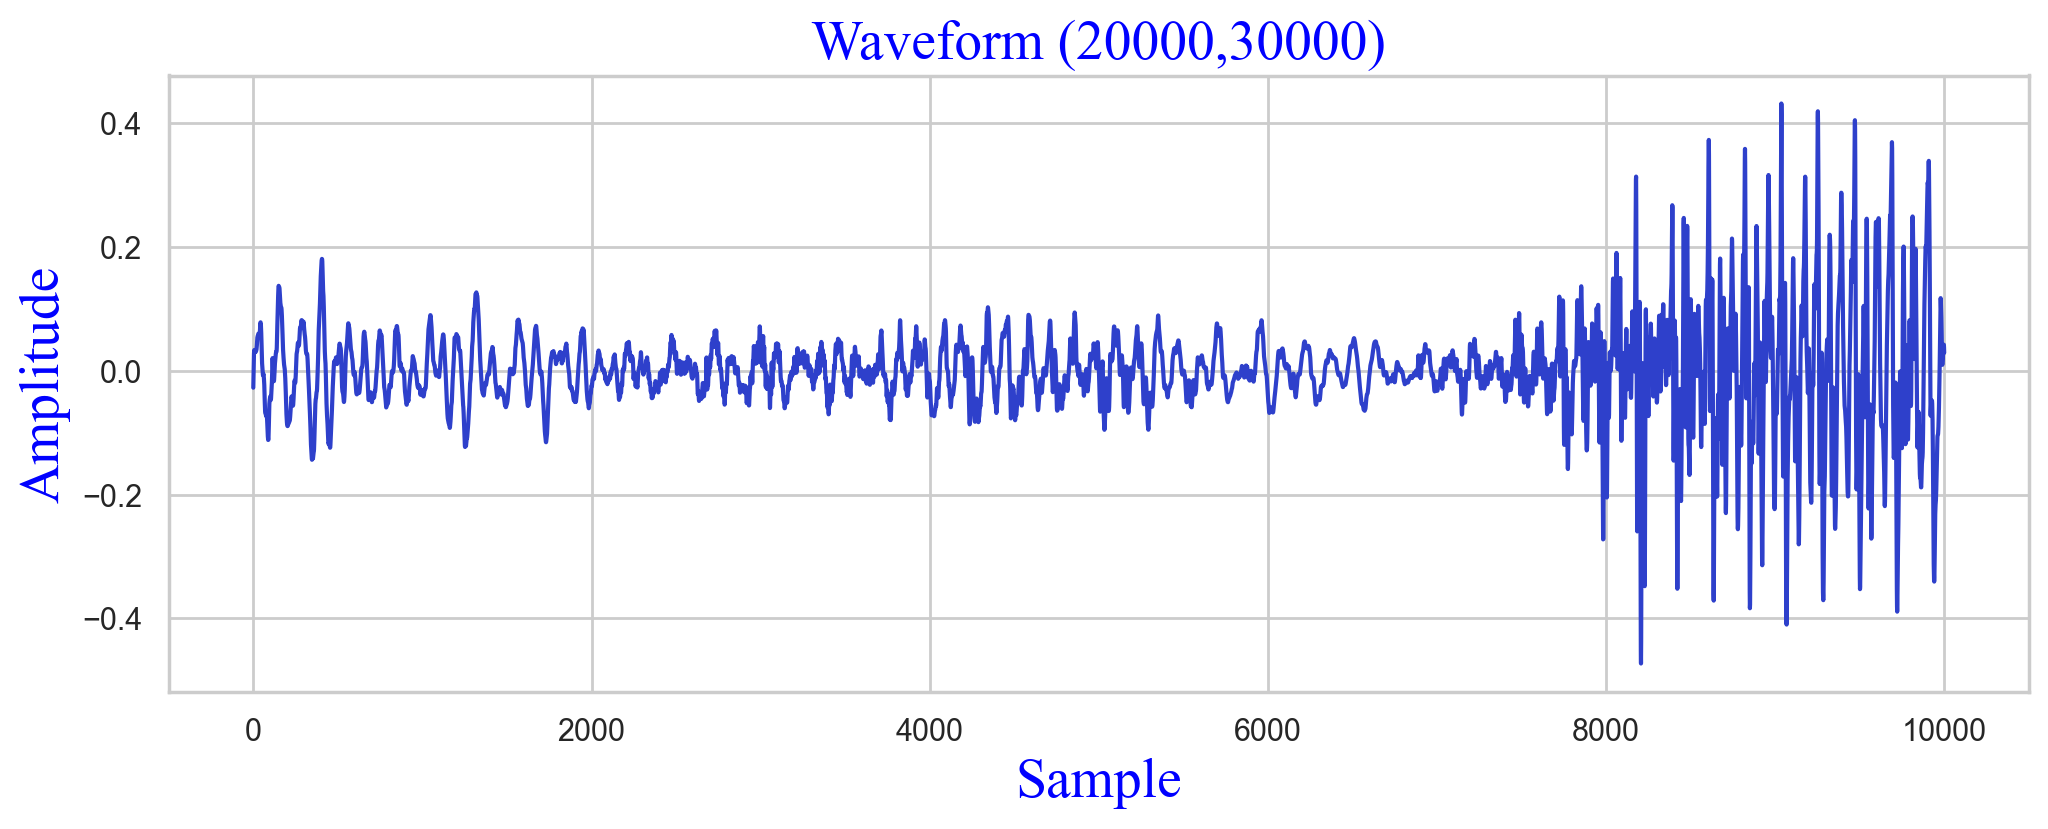

In [29]:
plt.figure(figsize=(12, 4), dpi=200)
plt.plot(happy_arr.iloc[0][20000:30000], color='#2E40CB')
plt.xlabel('Sample', fontdict= font2)
plt.ylabel('Amplitude', fontdict= font2)
plt.title('Waveform (20000,30000)', fontdict= font2)
plt.show()

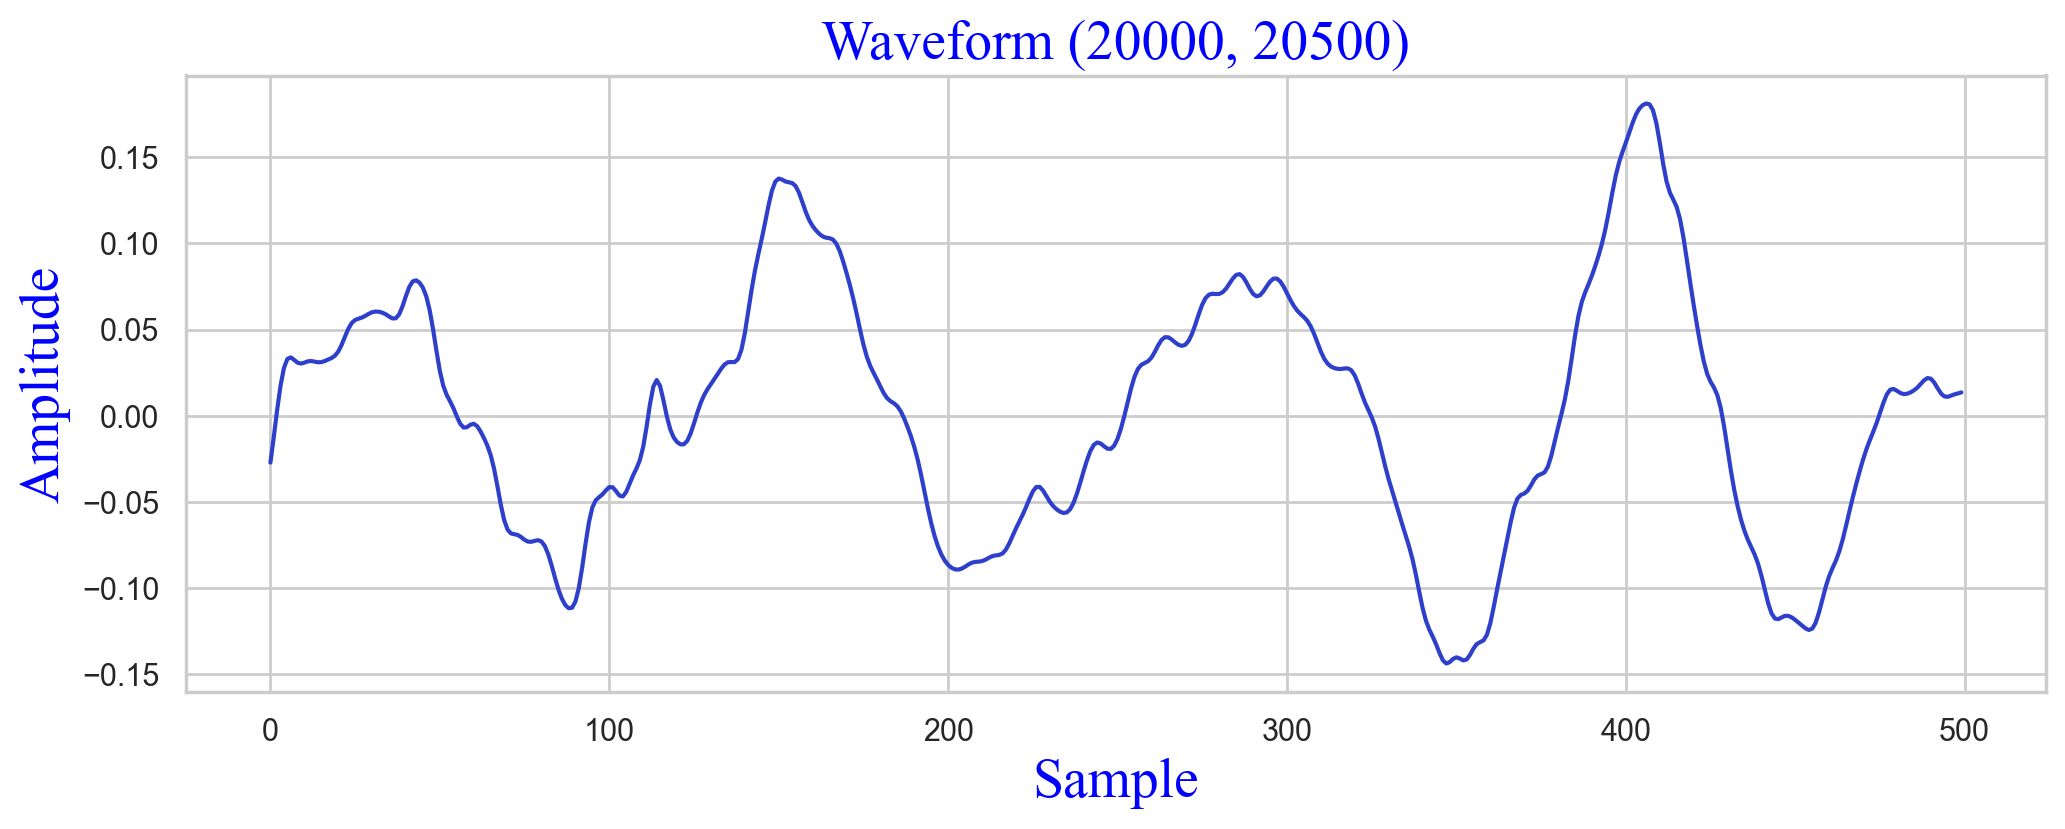

In [30]:
plt.figure(figsize=(12, 4), dpi=200)
plt.plot(happy_arr.iloc[0][20000:20500], color='#2E40CB')
plt.xlabel('Sample', fontdict= font2)
plt.ylabel('Amplitude', fontdict= font2)
plt.title('Waveform (20000, 20500)', fontdict= font2)
plt.show()

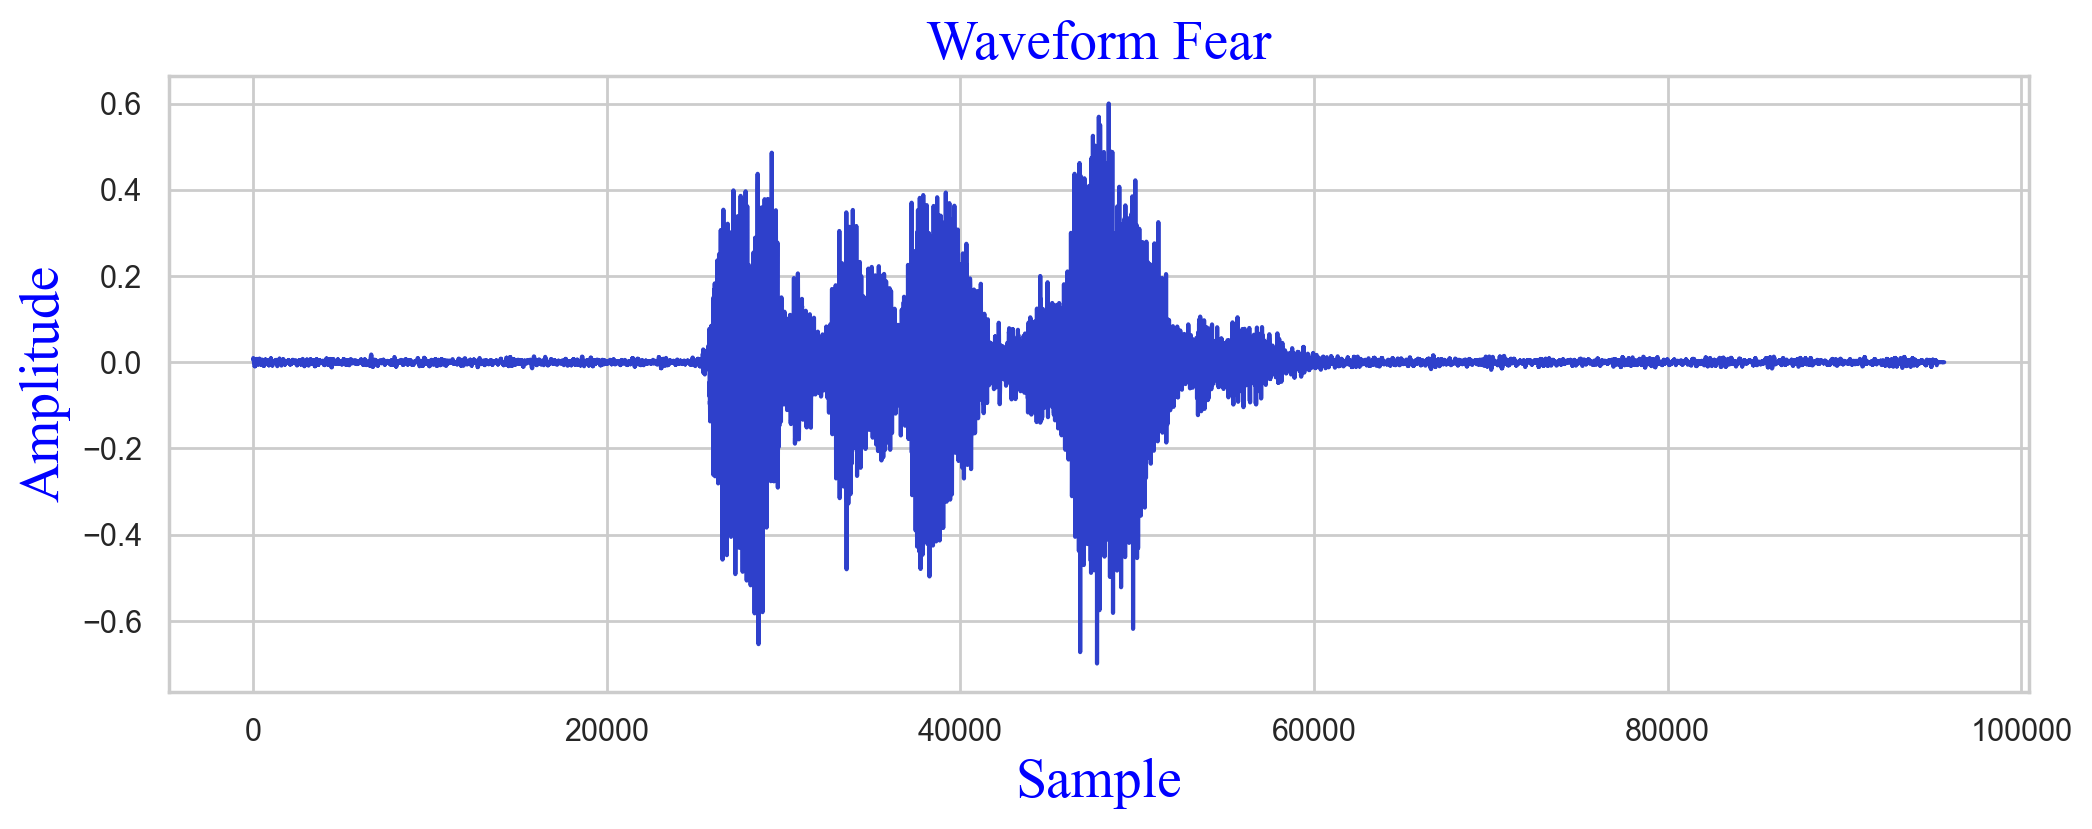

In [31]:
fear_sp = Sum_df_rep[Sum_df_rep['Emotions'] == 'fear']['Path']
fear_arr = Sum_df_rep[Sum_df_rep['Emotions'] == 'fear']['Arrays']

plt.figure(figsize=(12, 4), dpi=200)
plt.plot(fear_arr.iloc[0], color='#2E40CB')
plt.xlabel('Sample', fontdict= font2)
plt.ylabel('Amplitude', fontdict= font2)
plt.title('Waveform Fear', fontdict= font2)
plt.show()

Audio(fear_sp.iloc[0])

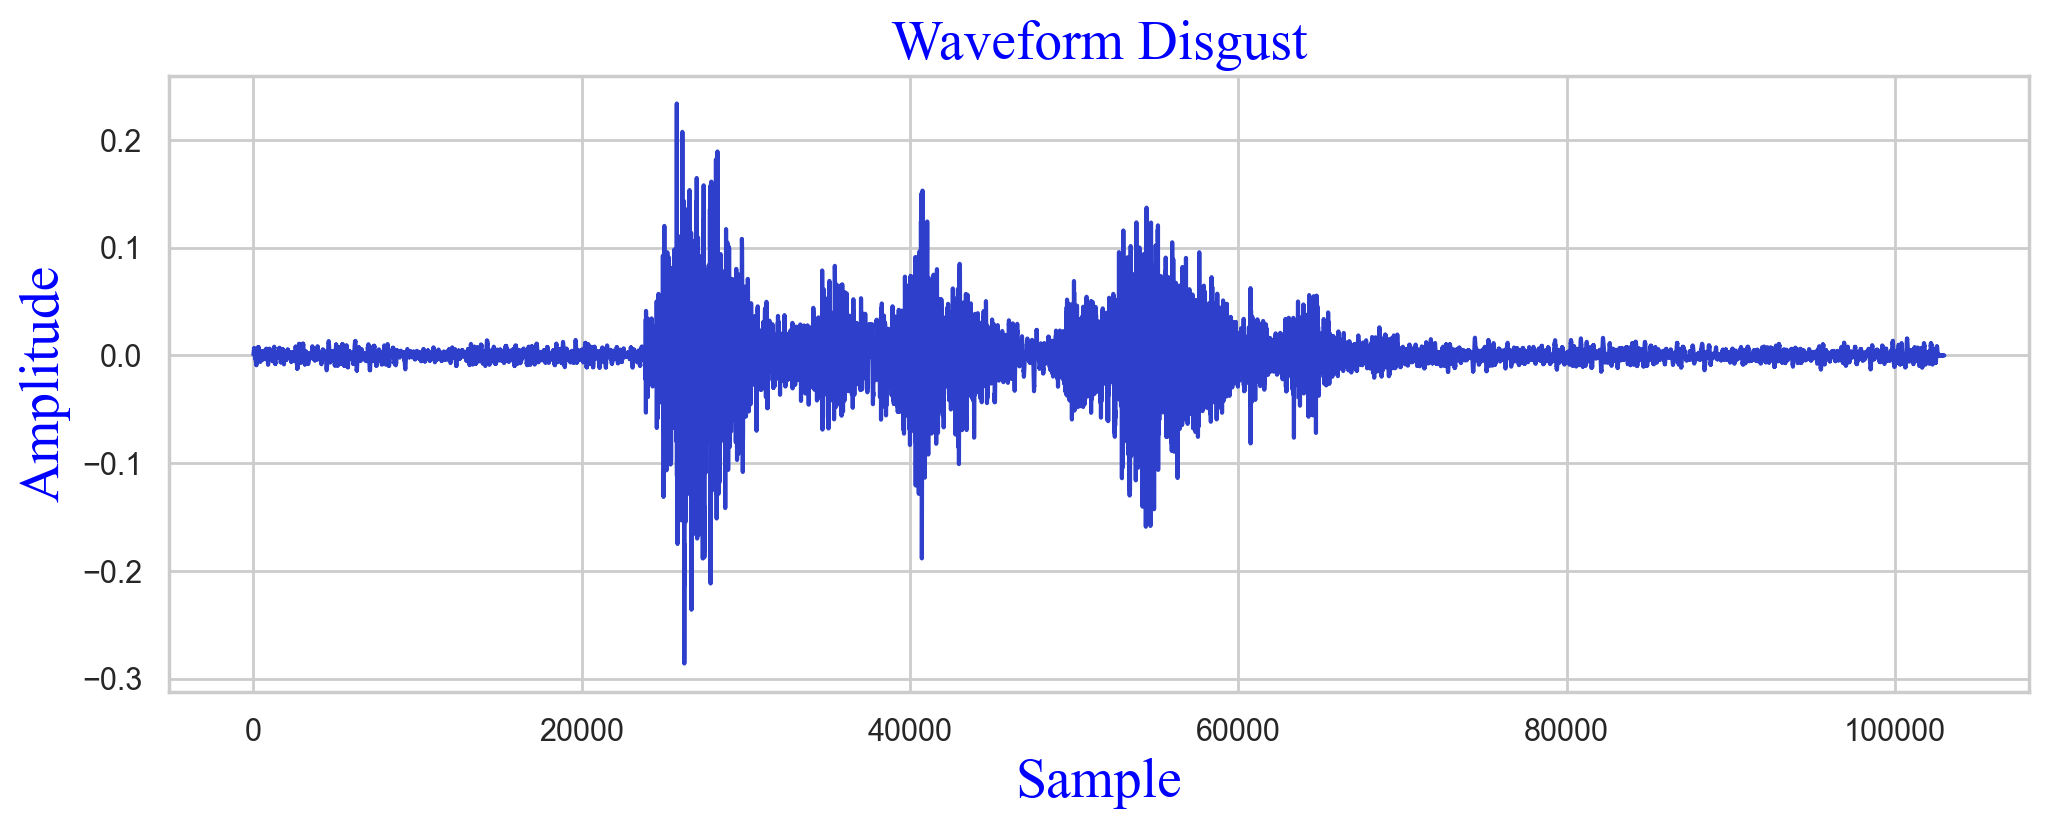

In [32]:
disgust_sp = Sum_df_rep[Sum_df_rep['Emotions'] == 'disgust']['Path']
disgust_arr = Sum_df_rep[Sum_df_rep['Emotions'] == 'disgust']['Arrays']

plt.figure(figsize=(12, 4), dpi=200)
plt.plot(disgust_arr.iloc[0], color='#2E40CB')
plt.xlabel('Sample', fontdict= font2)
plt.ylabel('Amplitude', fontdict= font2)
plt.title('Waveform Disgust', fontdict= font2)
plt.show()

Audio(disgust_sp.iloc[0])

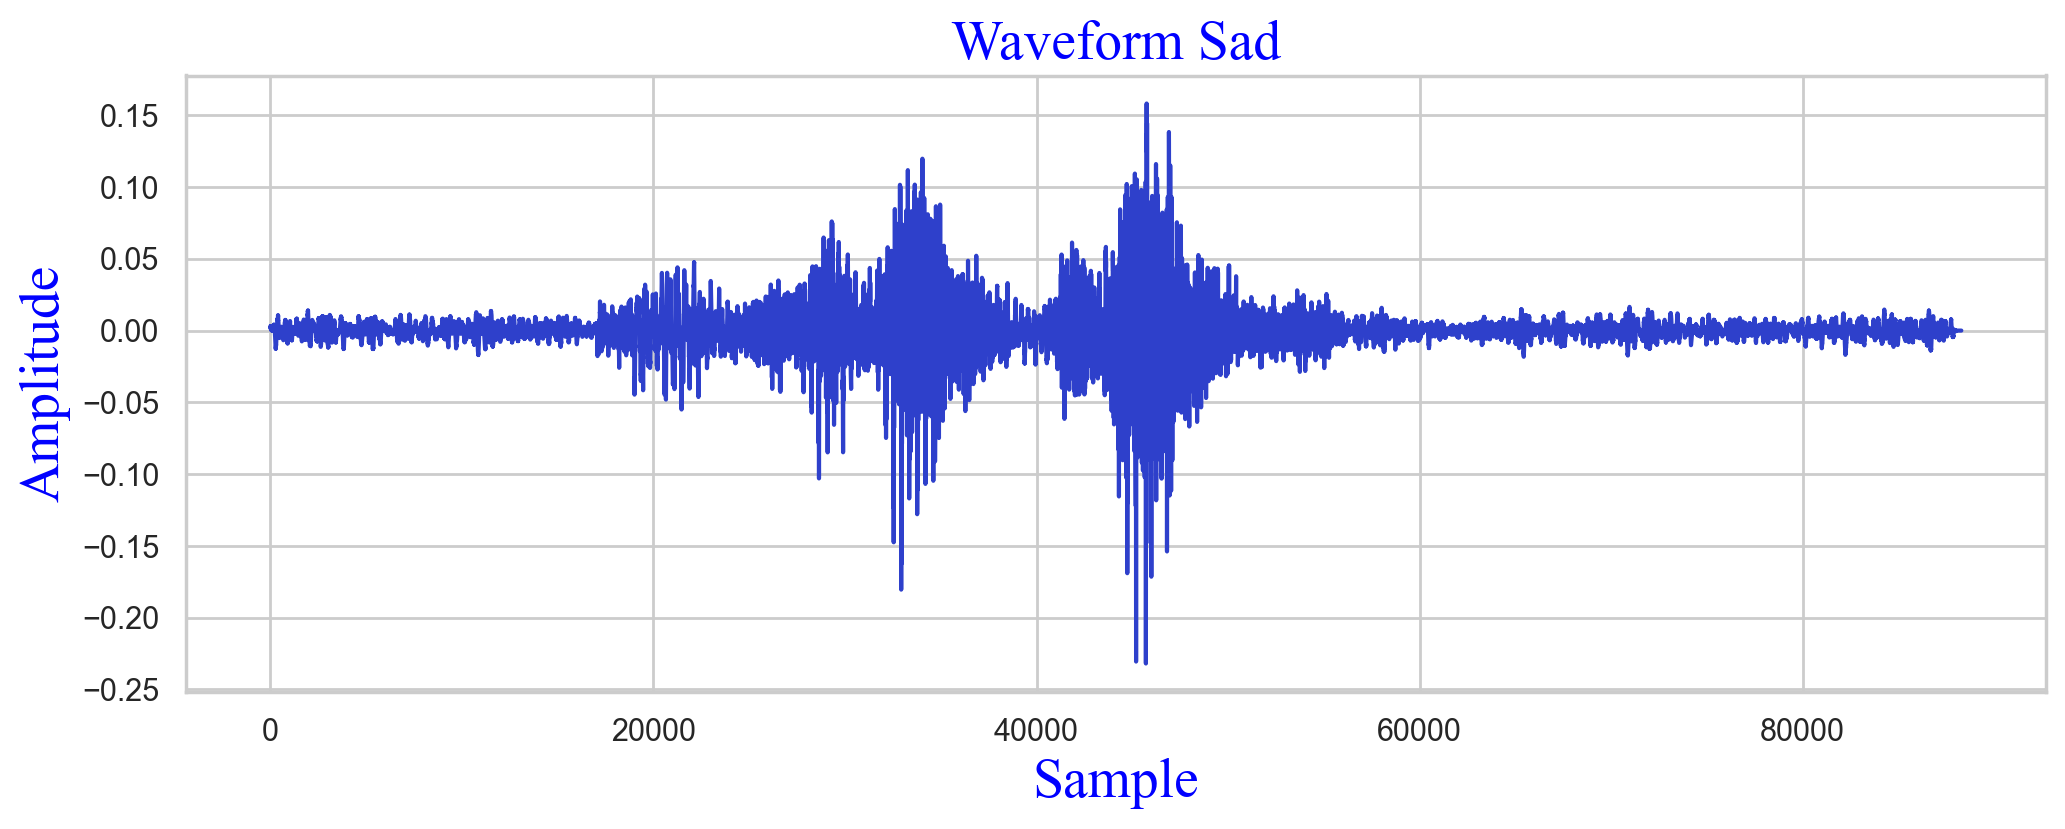

In [33]:
sad_sp = Sum_df_rep[Sum_df_rep['Emotions'] == 'sad']['Path']
sad_arr = Sum_df_rep[Sum_df_rep['Emotions'] == 'sad']['Arrays']

plt.figure(figsize=(12, 4), dpi=200)
plt.plot(sad_arr.iloc[0], color='#2E40CB')
plt.xlabel('Sample', fontdict= font2)
plt.ylabel('Amplitude', fontdict= font2)
plt.title('Waveform Sad', fontdict= font2)
plt.show()

Audio(sad_sp.iloc[0])

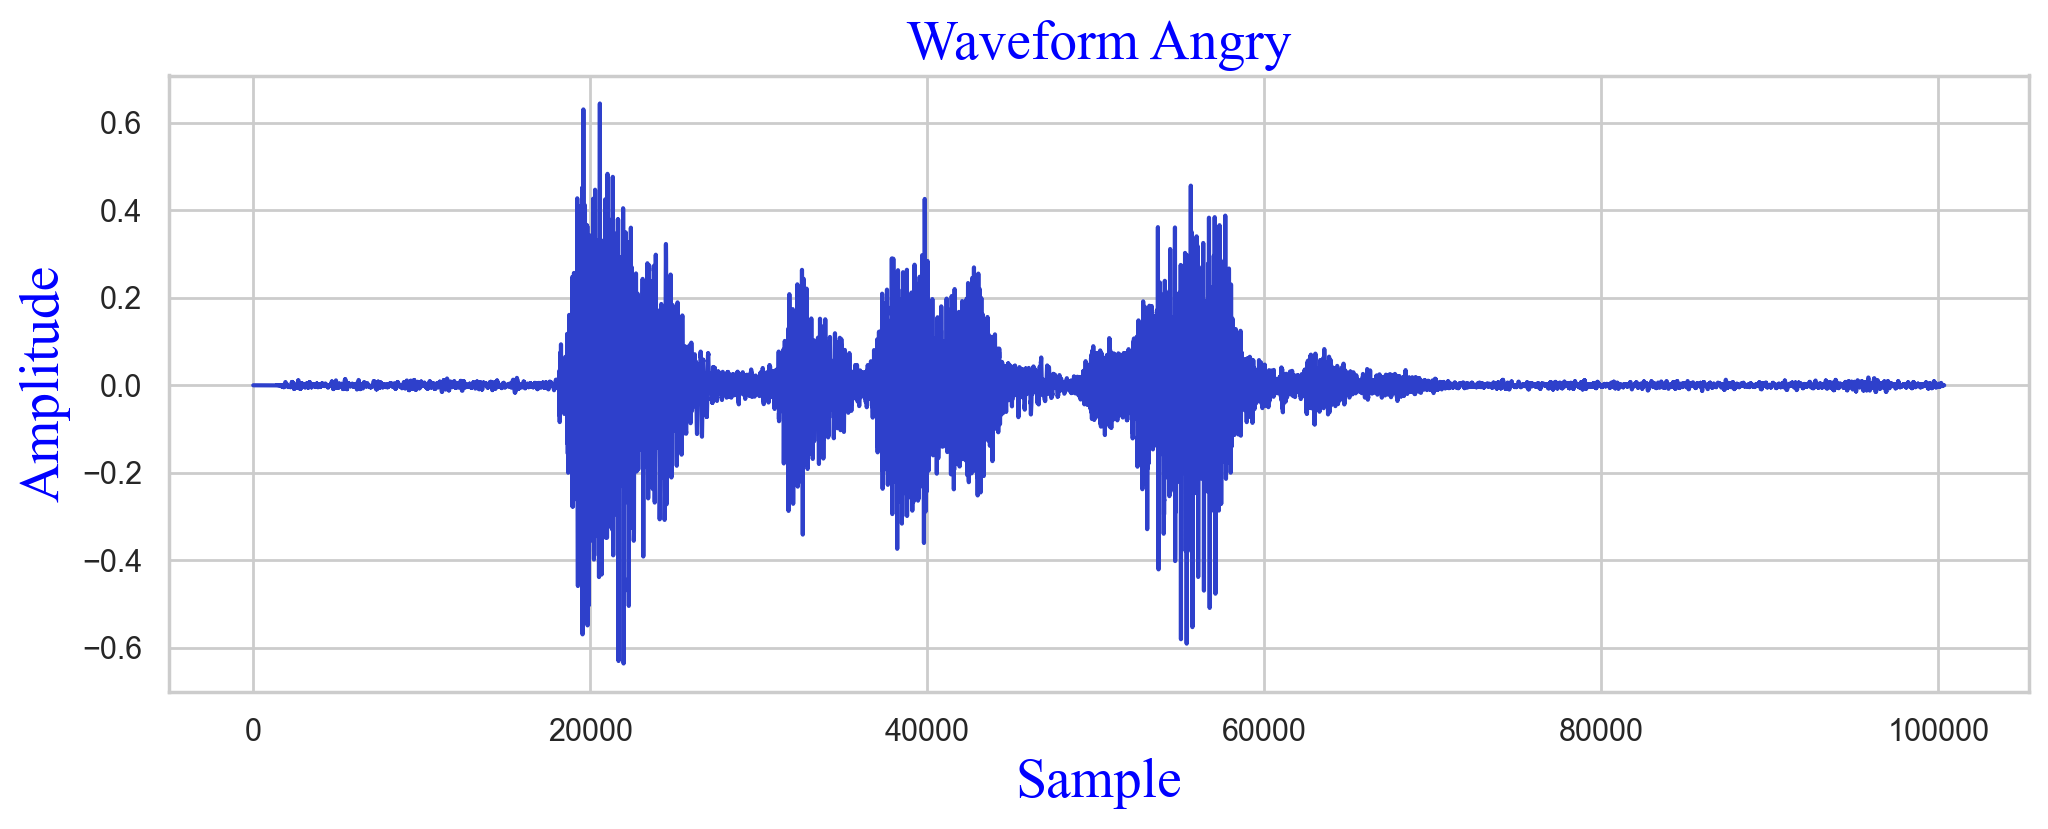

In [34]:
angry_sp = Sum_df_rep[Sum_df_rep['Emotions'] == 'angry']['Path']
angry_arr = Sum_df_rep[Sum_df_rep['Emotions'] == 'angry']['Arrays']

plt.figure(figsize=(12, 4), dpi=200)
plt.plot(angry_arr.iloc[0], color='#2E40CB')
plt.xlabel('Sample', fontdict= font2)
plt.ylabel('Amplitude', fontdict= font2)
plt.title('Waveform Angry', fontdict= font2)
plt.show()

Audio(angry_sp.iloc[0])

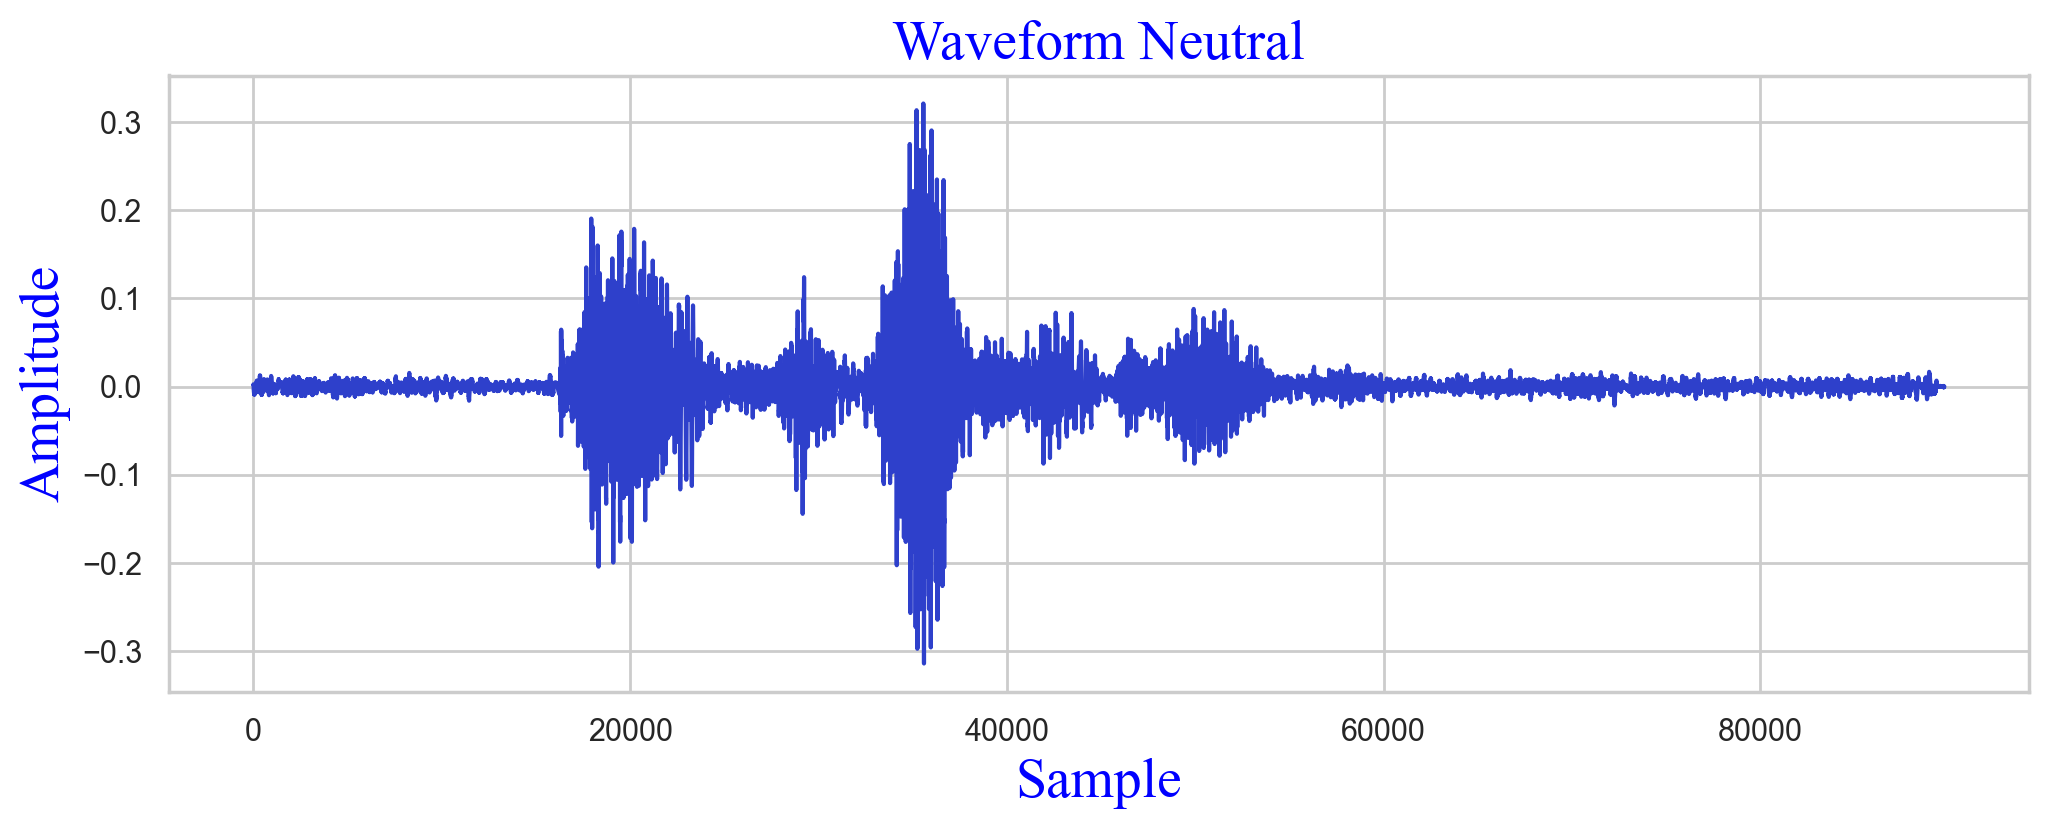

In [35]:
neutral_sp = Sum_df_rep[Sum_df_rep['Emotions'] == 'neutral']['Path']
neutral_arr = Sum_df_rep[Sum_df_rep['Emotions'] == 'neutral']['Arrays']

plt.figure(figsize=(12, 4), dpi=200)
plt.plot(neutral_arr.iloc[0], color='#2E40CB')
plt.xlabel('Sample', fontdict= font2)
plt.ylabel('Amplitude', fontdict= font2)
plt.title('Waveform Neutral', fontdict= font2)
plt.show()

Audio(neutral_sp.iloc[0])

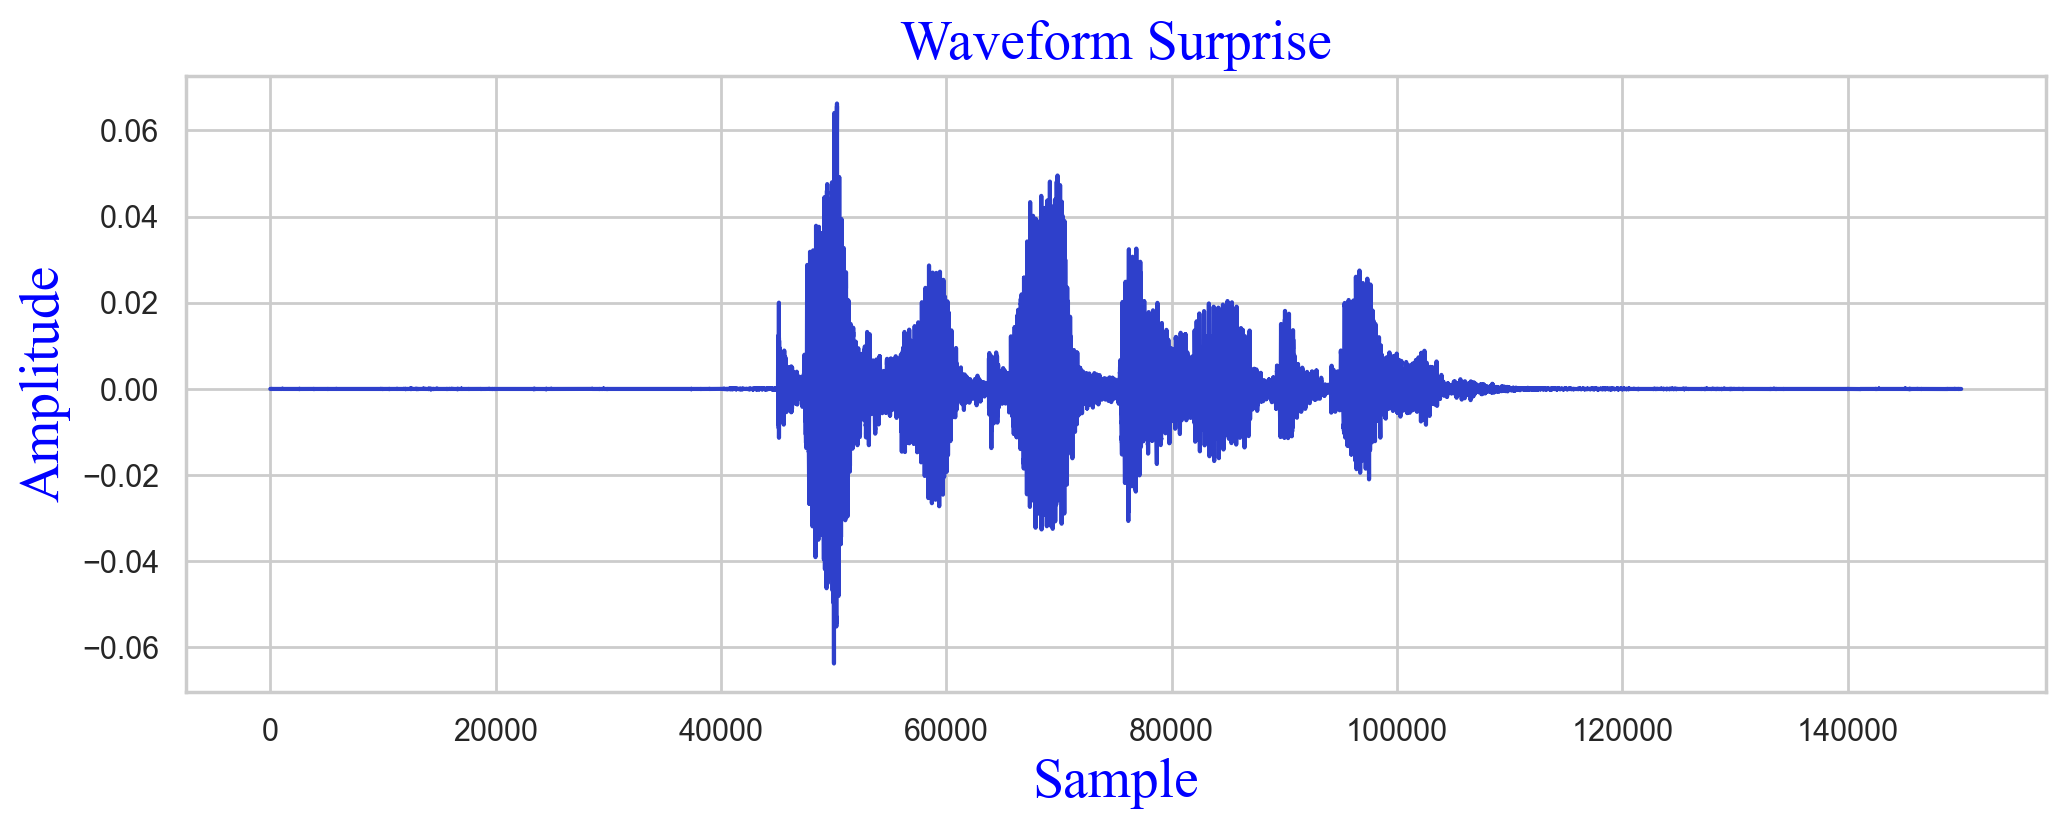

In [36]:
surprise_sp = Sum_df_rep[Sum_df_rep['Emotions'] == 'surprise']['Path']
surprise_arr = Sum_df_rep[Sum_df_rep['Emotions'] == 'surprise']['Arrays']

plt.figure(figsize=(12, 4), dpi=200)
plt.plot(surprise_arr.iloc[0], color='#2E40CB')
plt.xlabel('Sample', fontdict= font2)
plt.ylabel('Amplitude', fontdict= font2)
plt.title('Waveform Surprise', fontdict= font2)
plt.show()

Audio(surprise_sp.iloc[0])

In [37]:
sample_duration = 1/sr
print(sample_duration)

2.2675736961451248e-05


In [38]:
#duration of the audio signals in seconds
duration = sample_duration * len(audio_arrays)
print(f"Duration of signal is: {duration:.2f} seconds")

Duration of signal is: 0.28 seconds


In [39]:
Frame_size = 1024
#HOP =  Current frame how many samples shift to the right for calculating the next frame
Hop_lenght = 512 

#calculate the amplitude envelope

def amplitude_env (signal, frame_size, hop_length):
    amplitude_envelope = []
    
    #calculate AE (Amp Env) for each frame
    for i in range (0, len(signal), hop_length):
        current_frame_amplitude_env = max(signal[i:i+frame_size])
        amplitude_envelope.append(current_frame_amplitude_env)
        
    return np.array(amplitude_envelope)


def fancy_amplitude_env (signal, frame_size, hop_length):
    
    return np.array([max(signal[i:i+frame_size]) for i in range(0, signal.size, hop_length)])

In [40]:
Sp_fear = fear_arr.iloc[0]
Sp_disgust= disgust_arr.iloc[0]
Sp_happy= happy_arr.iloc[0]
Sp_sad = sad_arr.iloc[0]
Sp_neutral = neutral_arr.iloc[0]
Sp_angry = angry_arr.iloc[0]
Sp_surprise = surprise_arr.iloc[0]

In [41]:
AE_fear = amplitude_env(Sp_fear, Frame_size, Hop_lenght)
AE_disgust = amplitude_env(Sp_disgust, Frame_size, Hop_lenght)
AE_happy = amplitude_env(Sp_happy, Frame_size, Hop_lenght)
AE_sad = amplitude_env(Sp_sad, Frame_size, Hop_lenght)
AE_neutral = amplitude_env(Sp_neutral, Frame_size, Hop_lenght)
AE_angry = amplitude_env(Sp_angry, Frame_size, Hop_lenght)
AE_surprise = amplitude_env(Sp_surprise, Frame_size, Hop_lenght)

print(len(AE_fear), len(AE_disgust), len(AE_angry), len(AE_happy), len(AE_neutral),
     len(AE_surprise), len(AE_sad))

187 202 197 161 176 294 173


In [42]:
fancy_AE_fear = fancy_amplitude_env(Sp_fear, Frame_size, Hop_lenght)
fancy_AE_disgust = fancy_amplitude_env(Sp_disgust, Frame_size, Hop_lenght)
fancy_AE_happy = fancy_amplitude_env(Sp_happy, Frame_size, Hop_lenght)
fancy_AE_sad = fancy_amplitude_env(Sp_sad, Frame_size, Hop_lenght)
fancy_AE_neutral = fancy_amplitude_env(Sp_neutral, Frame_size, Hop_lenght)
fancy_AE_angry = fancy_amplitude_env(Sp_angry, Frame_size, Hop_lenght)
fancy_AE_surprise = fancy_amplitude_env(Sp_surprise, Frame_size, Hop_lenght)

print(len(fancy_AE_fear), len(fancy_AE_disgust), len(fancy_AE_angry),
      len(fancy_AE_happy), len(fancy_AE_neutral),
     len(fancy_AE_surprise), len(fancy_AE_sad))

187 202 197 161 176 294 173


In [43]:
(AE_fear == fancy_AE_fear).all()

True

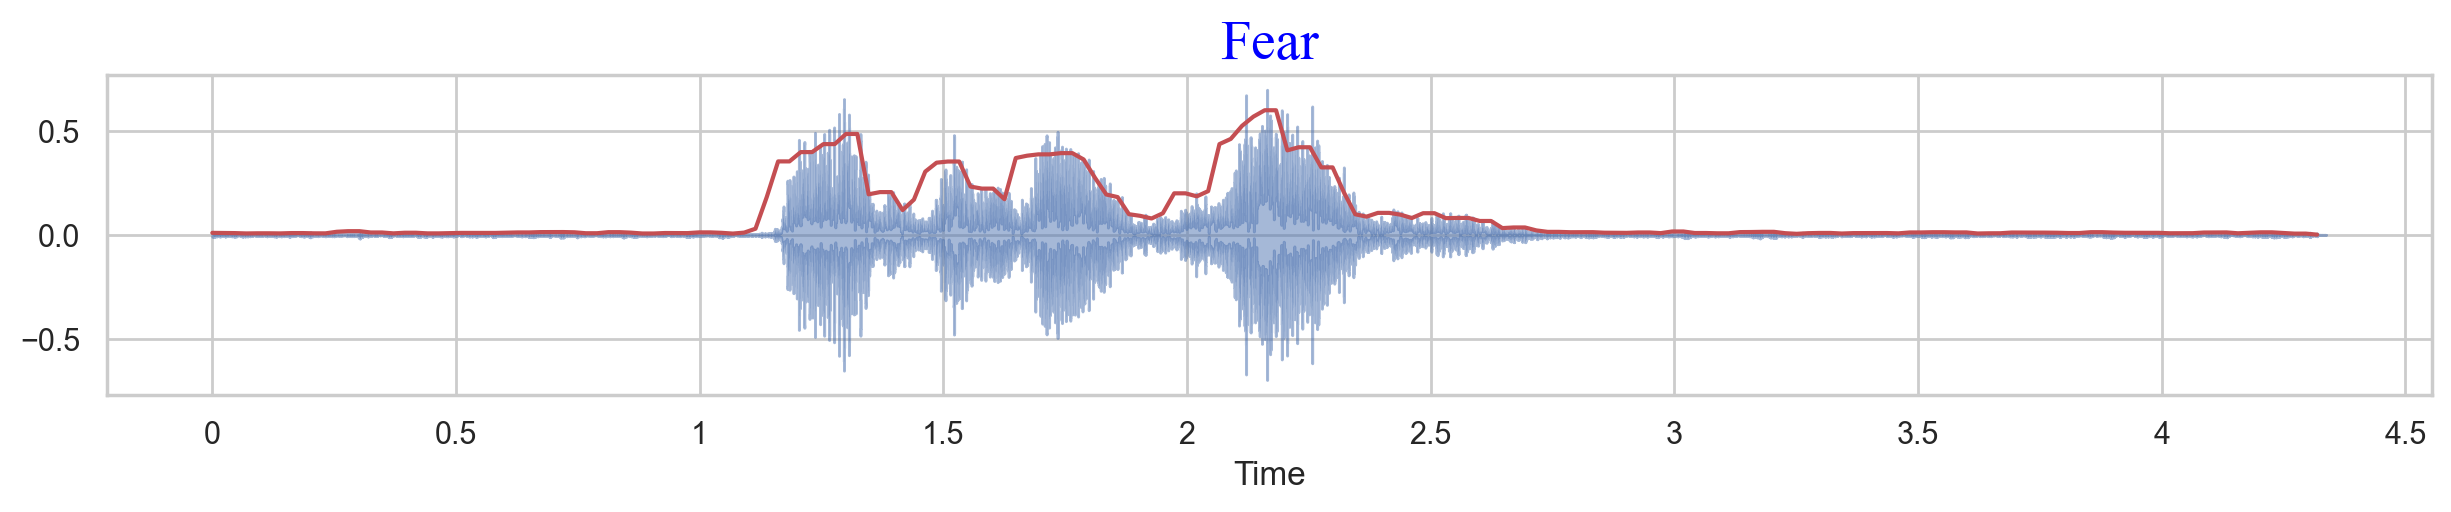

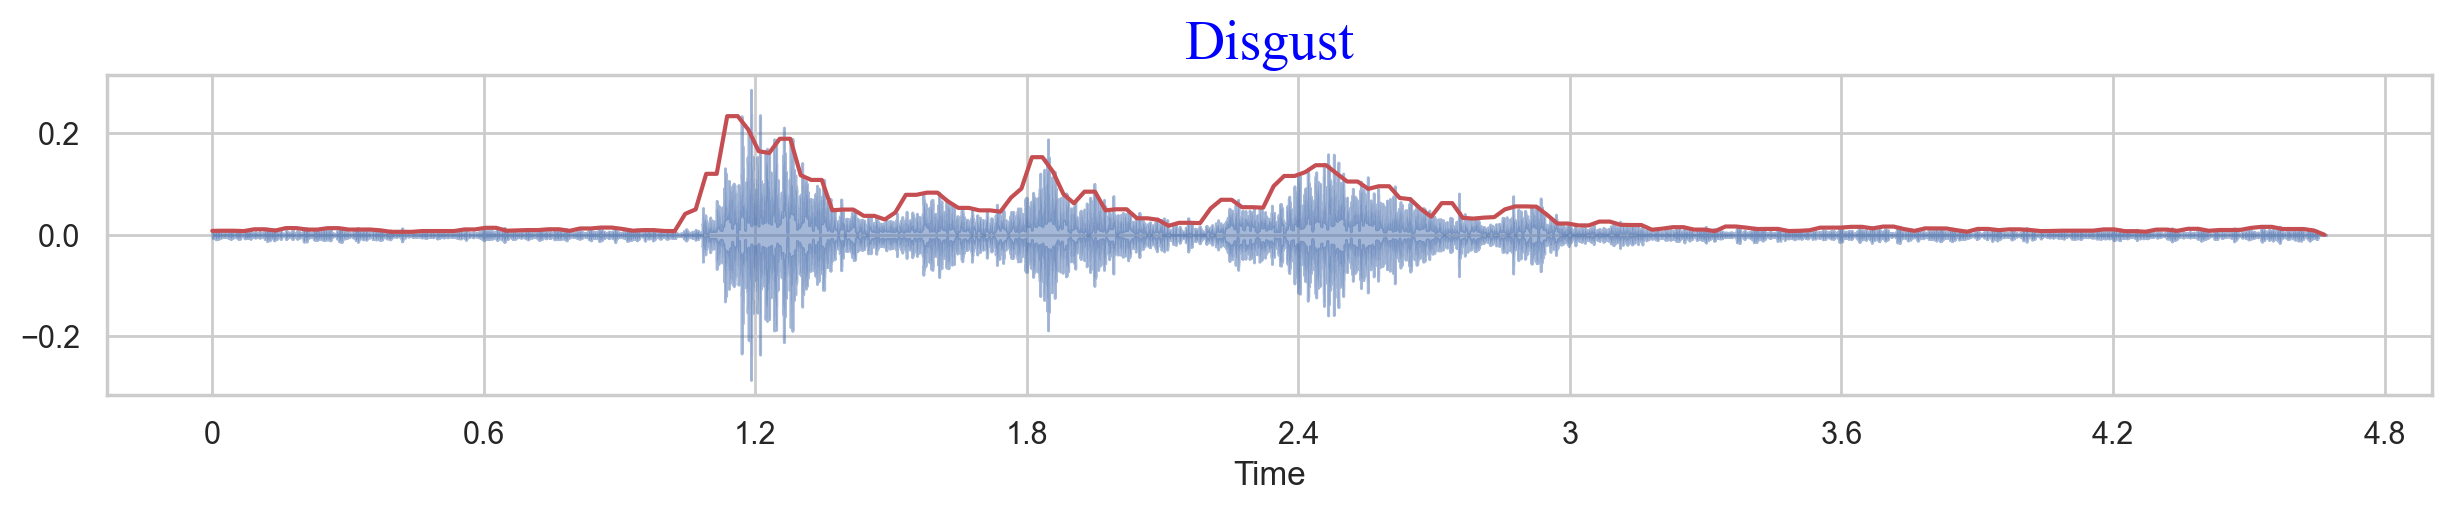

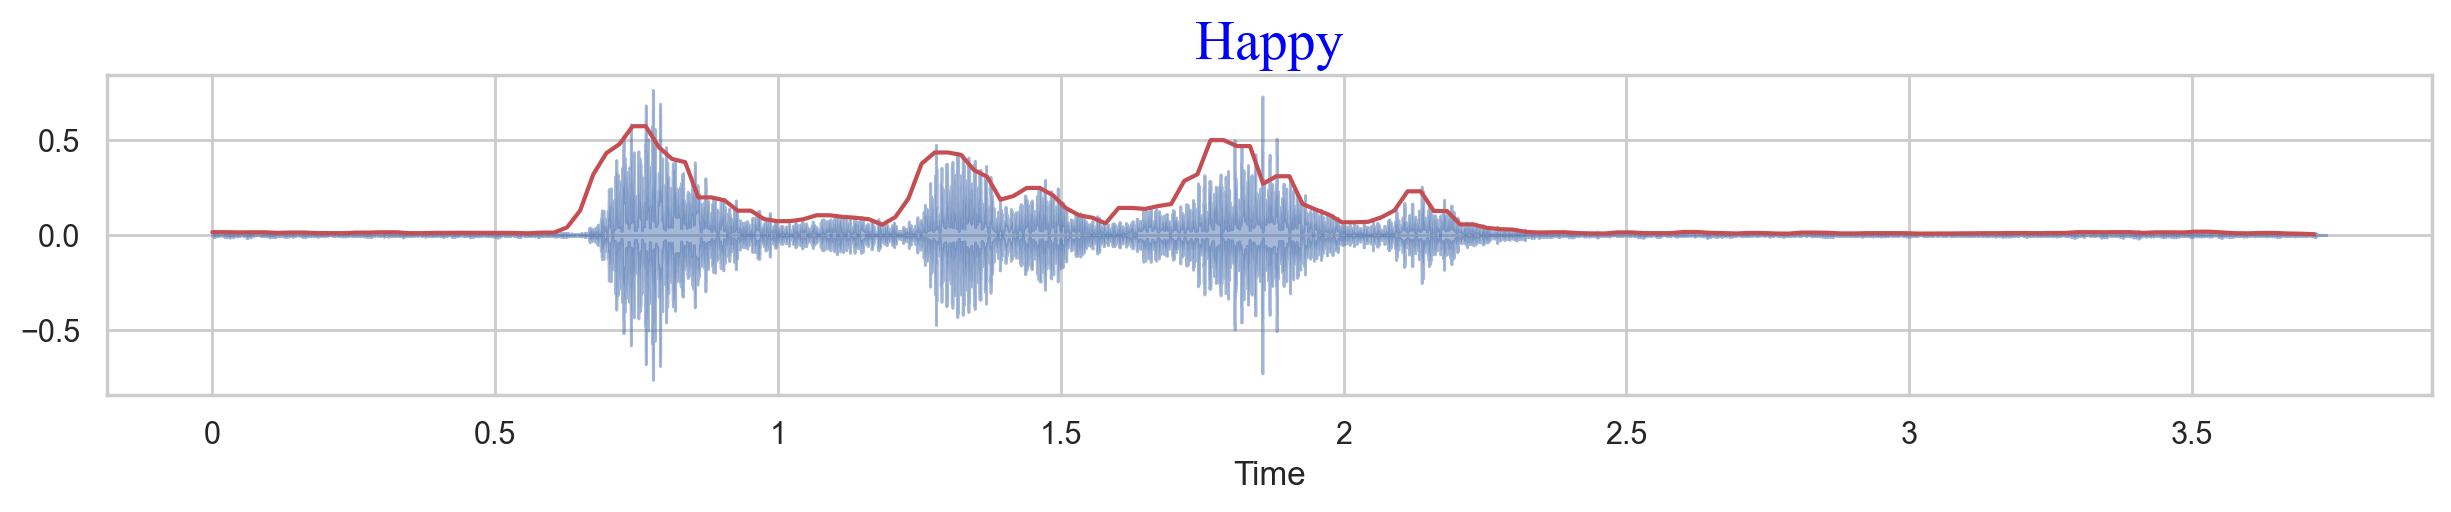

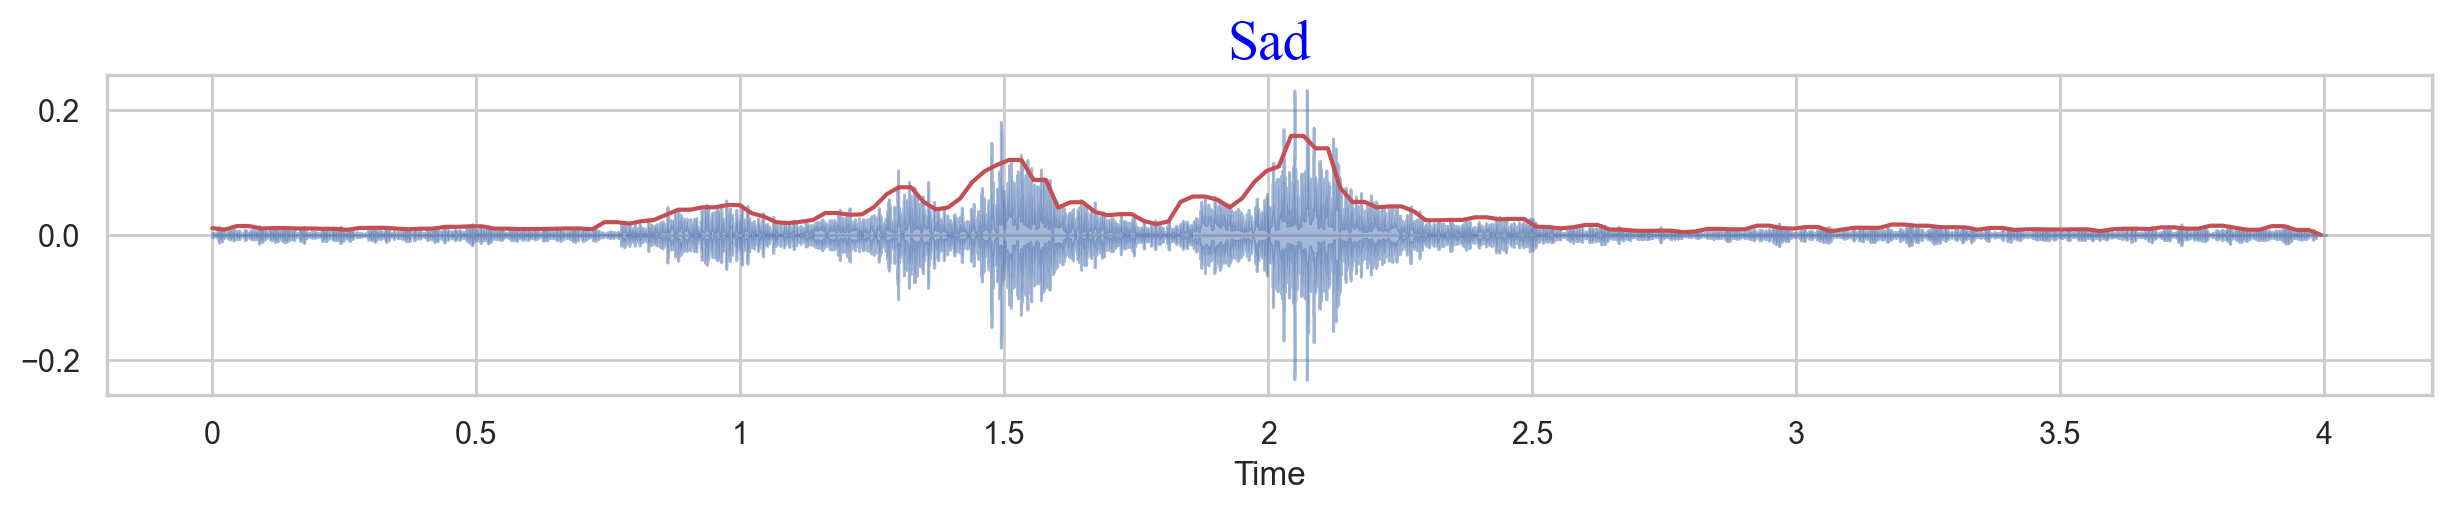

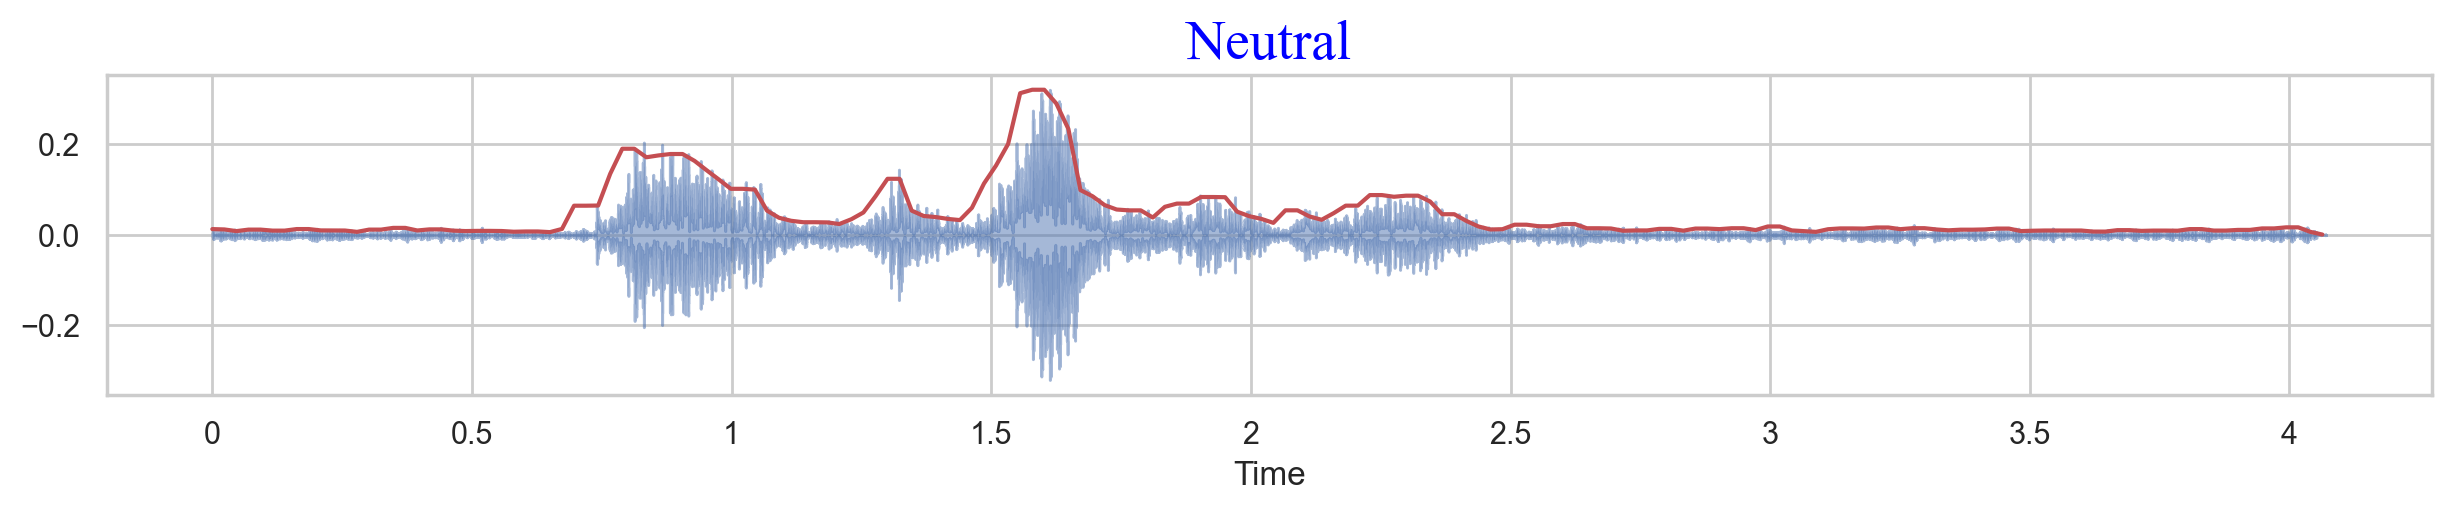

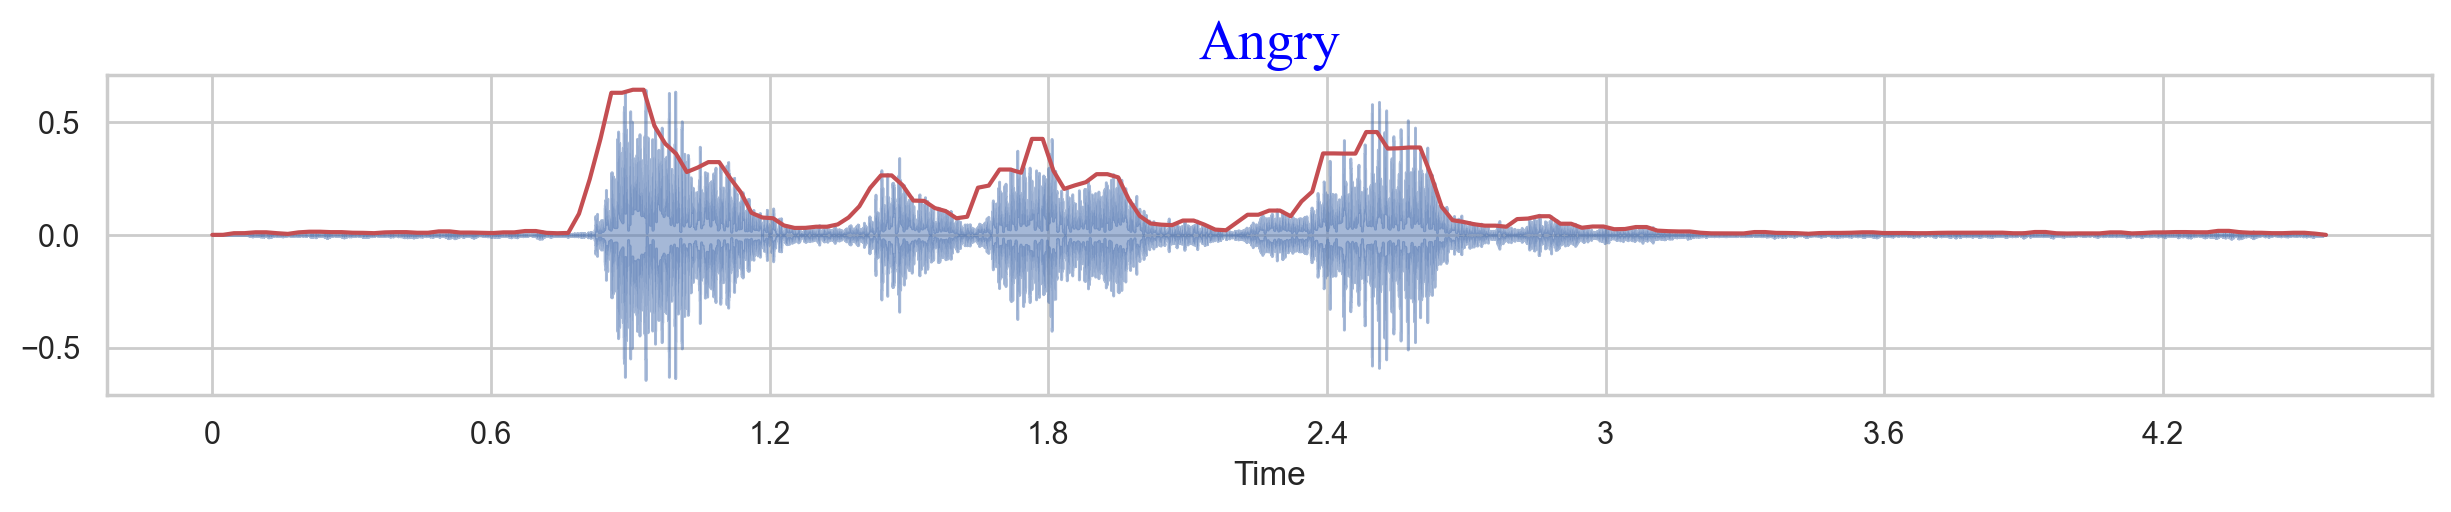

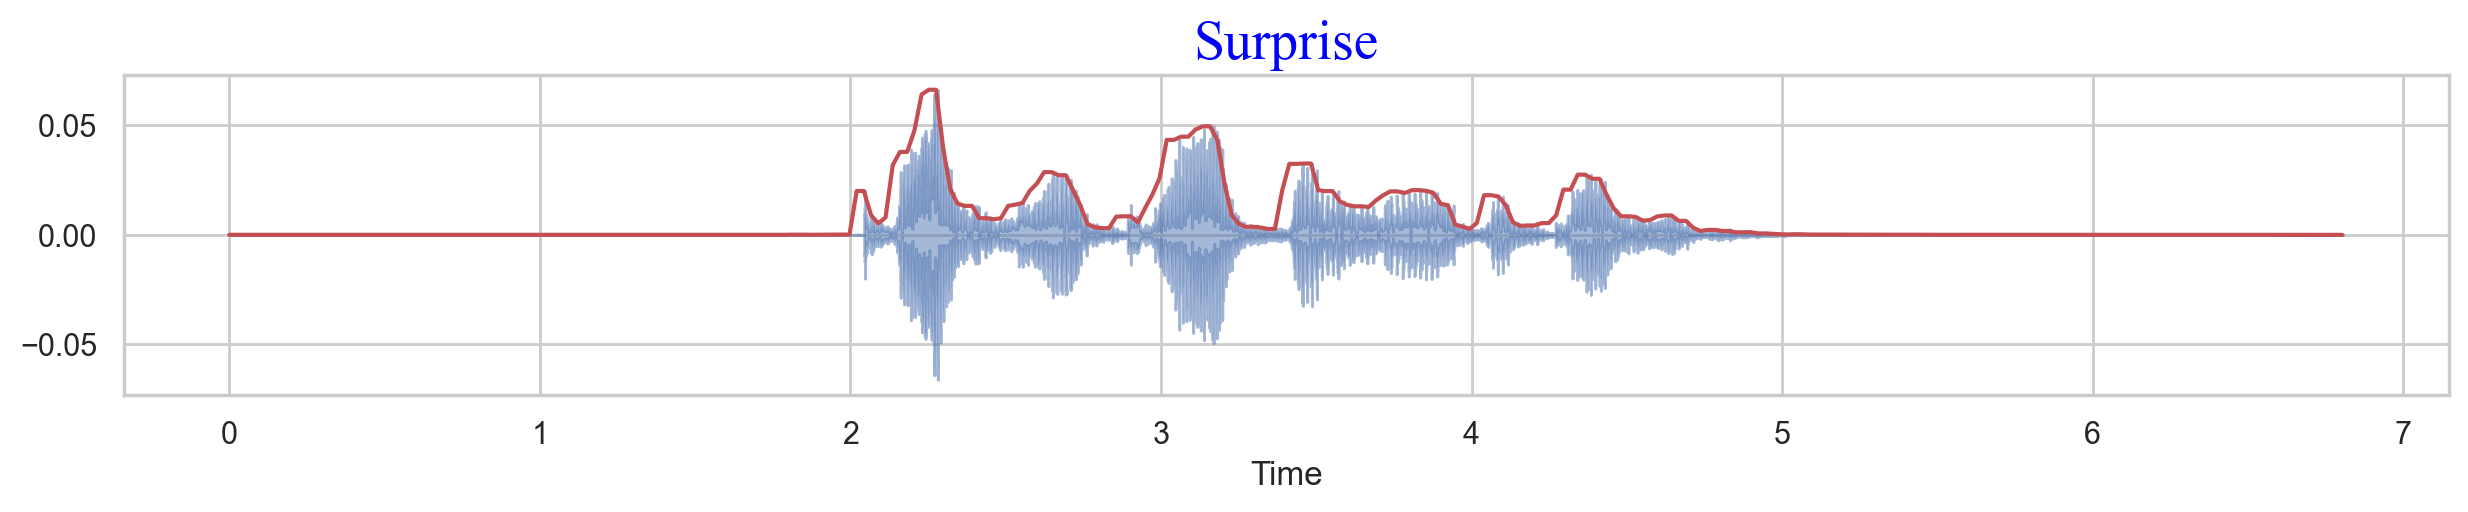

In [44]:
#Visualize amplitude envelope for all the audio files (Samples of each)

frames_fear = range(0, AE_fear.size)
frames_disgust = range(0, AE_disgust.size)
frames_happy = range(0, AE_happy.size)
frames_sad = range(0, AE_sad.size)
frames_neutral = range(0, AE_neutral.size)
frames_angry = range(0, AE_angry.size)
frames_surprise = range(0, AE_surprise.size)

t1 = librosa.frames_to_time(frames_fear, hop_length = Hop_lenght)
t2 = librosa.frames_to_time(frames_disgust, hop_length = Hop_lenght)
t3 = librosa.frames_to_time(frames_happy, hop_length = Hop_lenght)
t4 = librosa.frames_to_time(frames_sad, hop_length = Hop_lenght)
t5 = librosa.frames_to_time(frames_neutral, hop_length = Hop_lenght)
t6 = librosa.frames_to_time(frames_angry, hop_length = Hop_lenght)
t7 = librosa.frames_to_time(frames_surprise, hop_length = Hop_lenght)


plt.figure(figsize=(15,17), dpi=200)
plt.subplot(7,1,1)
librosa.display.waveshow(Sp_fear, alpha = 0.5)
plt.plot(t1, AE_fear, color = "r")
plt.title("Fear", fontdict= font2)
plt.show()

plt.figure(figsize=(15,17), dpi=200)
plt.subplot(7,1,2)
librosa.display.waveshow(Sp_disgust, alpha = 0.5)
plt.plot(t2, AE_disgust, color = "r")
plt.title("Disgust", fontdict= font2)
plt.show()

plt.figure(figsize=(15,17), dpi=200)
plt.subplot(7,1,3)
librosa.display.waveshow(Sp_happy, alpha = 0.5)
plt.plot(t3, AE_happy, color = "r")
plt.title("Happy", fontdict= font2)
plt.show()

plt.figure(figsize=(15,17), dpi=200)
plt.subplot(7,1,4)
librosa.display.waveshow(Sp_sad, alpha = 0.5)
plt.plot(t4, AE_sad, color = "r")
plt.title("Sad", fontdict= font2)
plt.show()


plt.figure(figsize=(15,17), dpi=200)
plt.subplot(7,1,5)
librosa.display.waveshow(Sp_neutral, alpha = 0.5)
plt.plot(t5, AE_neutral, color = "r")
plt.title("Neutral", fontdict= font2)
plt.show()


plt.figure(figsize=(15,17), dpi=200)
plt.subplot(7,1,6)
librosa.display.waveshow(Sp_angry, alpha = 0.5)
plt.plot(t6, AE_angry, color = "r")
plt.title("Angry", fontdict= font2)
plt.show()


plt.figure(figsize=(15,17), dpi=200)
plt.subplot(7,1,7)
librosa.display.waveshow(Sp_surprise, alpha = 0.5)
plt.plot(t7, AE_surprise, color = "r")
plt.title("Surprise", fontdict= font2)
plt.show()

In [45]:
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data



def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate=0.8)


# taking any example and checking for techniques.
path = np.array(Sum_df_rep.Path)[1]
data, sample_rate = librosa.load(path)

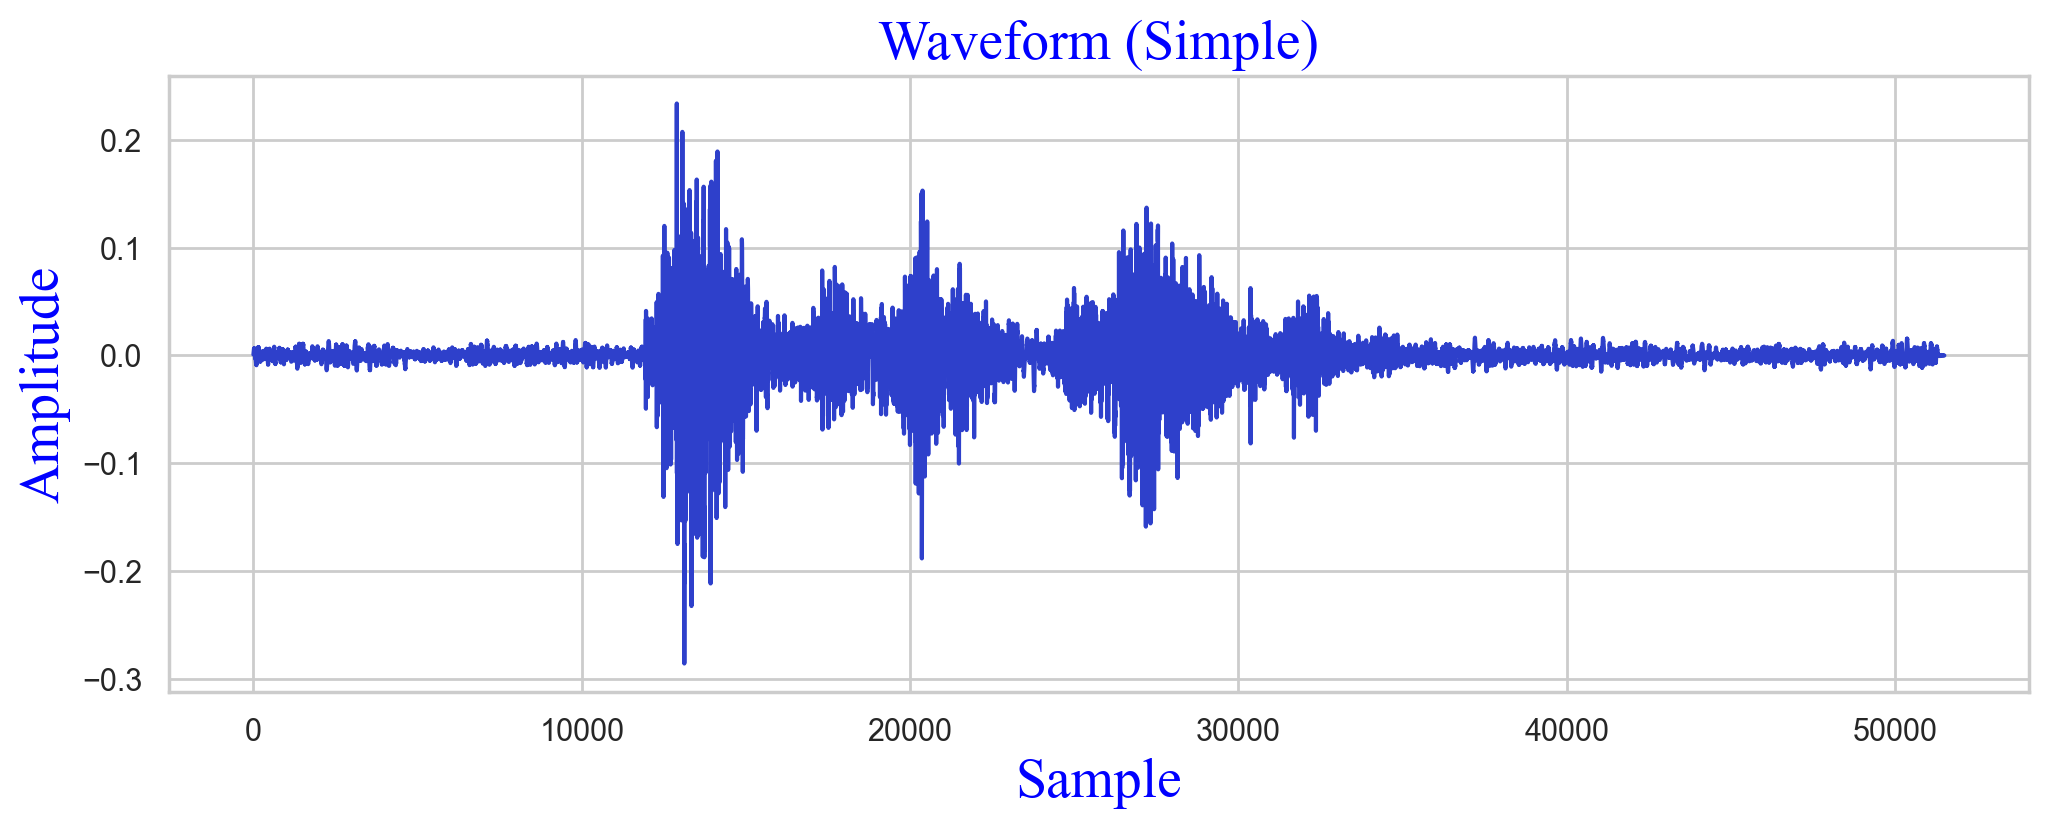

In [46]:
Simple_data = data
plt.figure(figsize=(12, 4), dpi=200)
plt.plot(Simple_data ,color='#2E40CB')
plt.xlabel('Sample', fontdict= font2)
plt.ylabel('Amplitude', fontdict= font2)
plt.title('Waveform (Simple)', fontdict= font2)
plt.show()

Audio(Simple_data, rate=sample_rate)

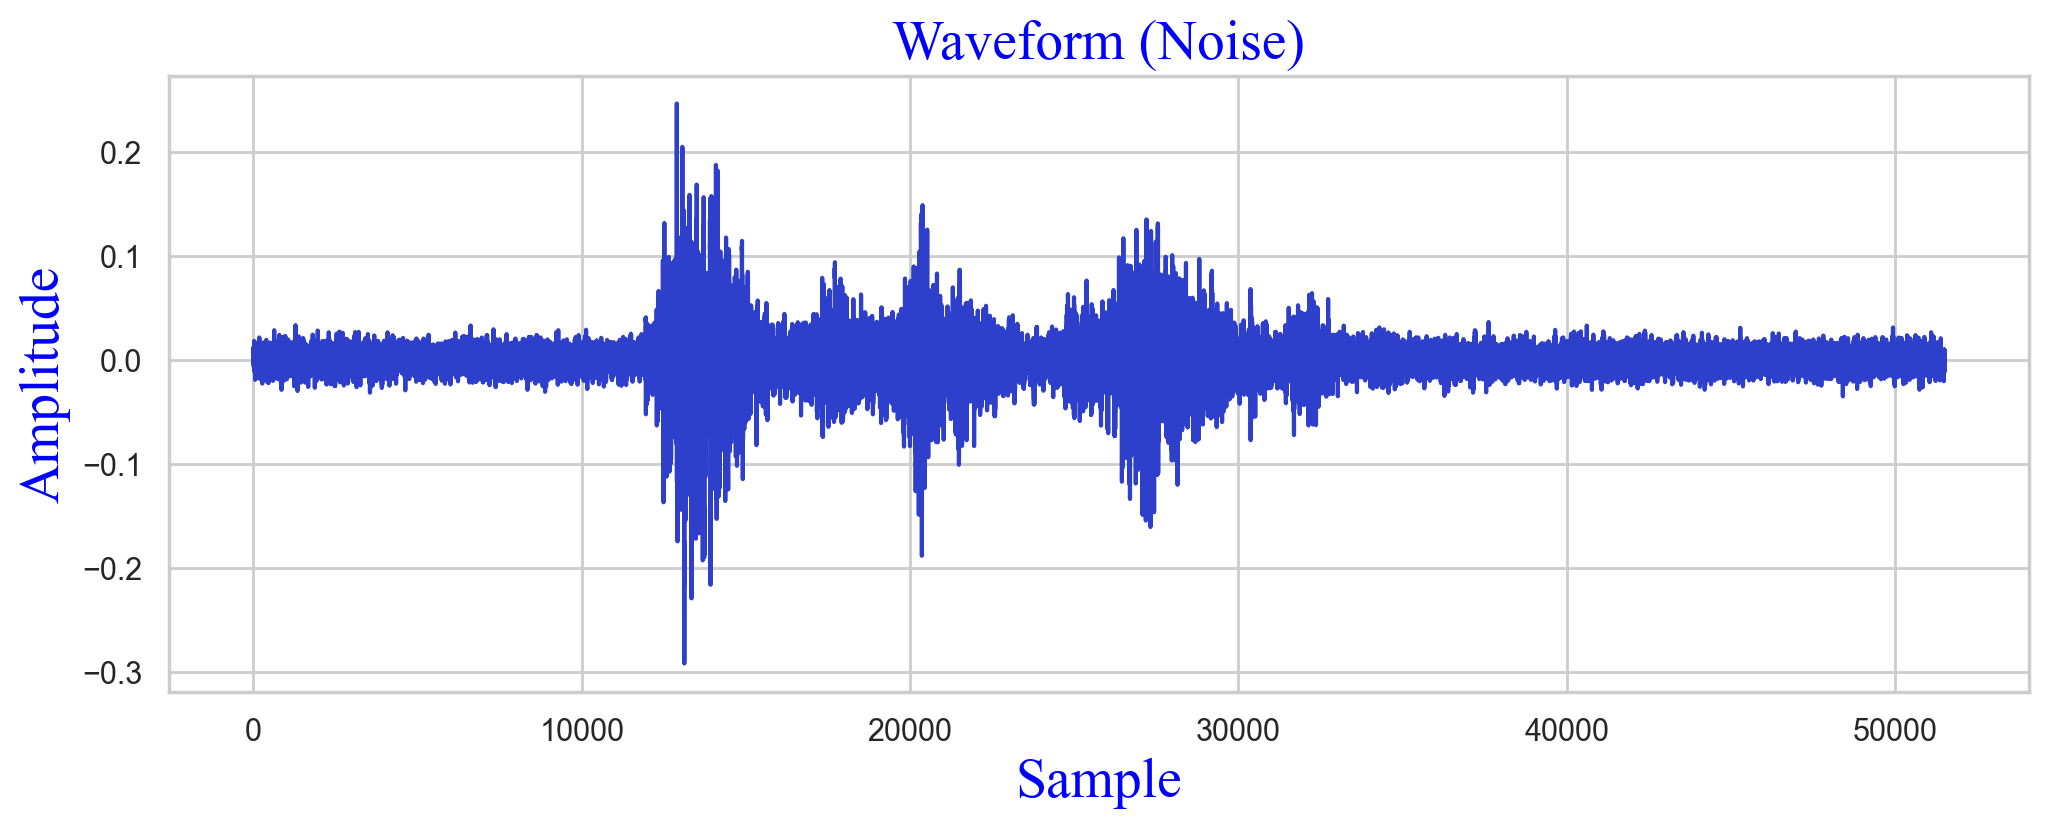

In [47]:
Noise_data = noise(data)
plt.figure(figsize=(12, 4), dpi=200)
plt.plot(Noise_data ,color='#2E40CB')
plt.xlabel('Sample', fontdict= font2)
plt.ylabel('Amplitude', fontdict= font2)
plt.title('Waveform (Noise)', fontdict= font2)
plt.show()

Audio(Noise_data, rate=sample_rate)

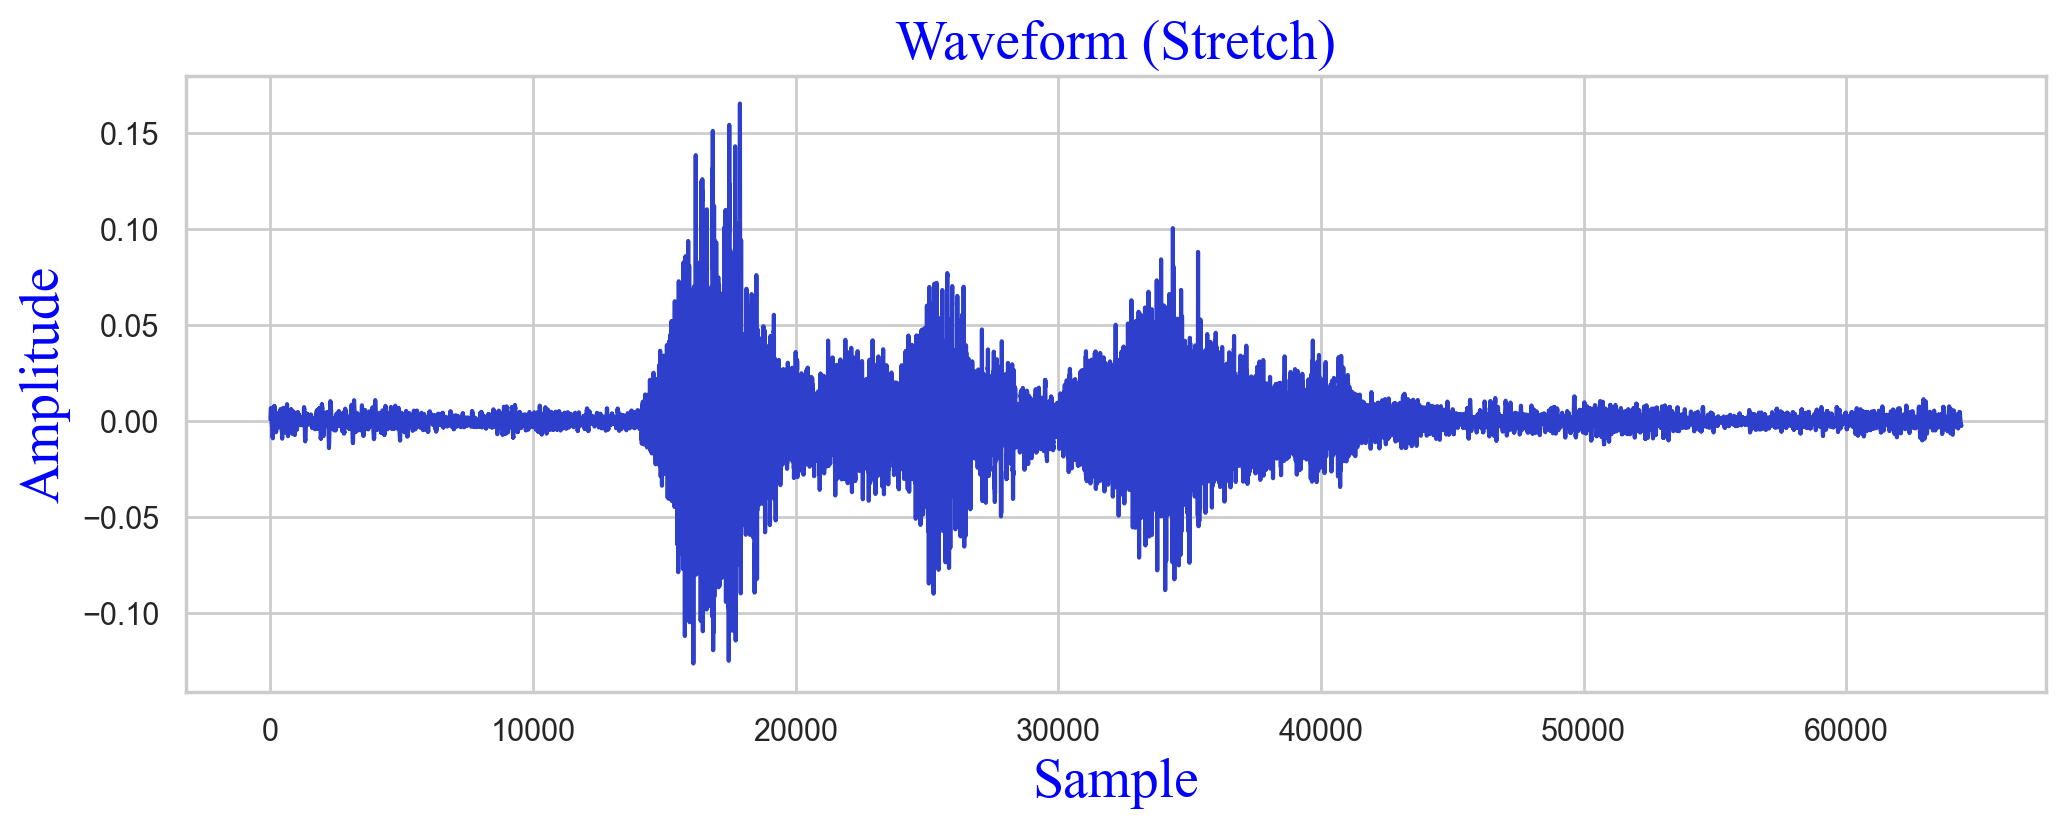

In [48]:
Stretch_data = stretch(data)
plt.figure(figsize=(12, 4), dpi=200)
plt.plot(Stretch_data ,color='#2E40CB')
plt.xlabel('Sample', fontdict= font2)
plt.ylabel('Amplitude', fontdict= font2)
plt.title('Waveform (Stretch)', fontdict= font2)
plt.show()

Audio(Stretch_data, rate=sample_rate)

In [49]:
Crema_df

Emotions                            Path
0       angry  Data/Crema/1001_DFA_ANG_XX.wav
1     disgust  Data/Crema/1001_DFA_DIS_XX.wav
2        fear  Data/Crema/1001_DFA_FEA_XX.wav
3       happy  Data/Crema/1001_DFA_HAP_XX.wav
4     neutral  Data/Crema/1001_DFA_NEU_XX.wav
...       ...                             ...
7437  disgust  Data/Crema/1091_WSI_DIS_XX.wav
7438     fear  Data/Crema/1091_WSI_FEA_XX.wav
7439    happy  Data/Crema/1091_WSI_HAP_XX.wav
7440  neutral  Data/Crema/1091_WSI_NEU_XX.wav
7441      sad  Data/Crema/1091_WSI_SAD_XX.wav

[7442 rows x 2 columns]

In [50]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration = 3, offset = 0.5)
    mfcc = np.mean(librosa.feature.mfcc(y = y, sr = sr, n_mfcc = 40).T, axis = 0)
    return mfcc

In [51]:
extract_mfcc(Crema_df['Path'][0])

array([-3.2420966e+02,  1.2839470e+02, -1.9360773e+01,  4.5353886e+01,
       -7.7810597e+00,  1.6801313e+01, -2.5136724e+01, -2.0426500e+00,
       -1.2736442e+01, -6.0262287e-01, -1.2893606e+01, -1.9871272e+00,
       -2.5880756e+00, -1.6210602e+01,  1.1422585e+01, -1.4656595e+01,
       -4.7940111e+00, -4.4950318e+00, -2.2649443e-01, -1.0050797e+01,
       -6.2041969e+00, -4.9112763e+00, -8.6487637e+00, -1.6191192e+00,
       -5.5614219e+00,  3.7206151e+00, -6.3599520e+00,  1.2718621e-01,
       -3.5127904e+00, -1.8107890e+00, -1.8642118e+00, -2.1195214e+00,
       -1.8940741e-01, -4.1996927e+00, -3.3023129e+00, -7.4549870e+00,
       -2.4175286e+00, -5.8262525e+00, -1.8155656e+00, -3.8114743e+00],
      dtype=float32)

In [52]:
%%time
X_mfcc = Crema_df['Path'].apply(lambda x: extract_mfcc(x))

CPU times: total: 1min 57s
Wall time: 1min 53s


In [53]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(7442, 40)

In [54]:
## input split
X = np.expand_dims(X, -1)
X.shape

(7442, 40, 1)

In [55]:
enc = OneHotEncoder()
y = enc.fit_transform(Crema_df[['Emotions']])

In [56]:
y = y.toarray()

In [58]:
model1 = Sequential([
    LSTM(256, return_sequences=False, input_shape=(40,1)),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(6, activation='softmax')
])

model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model1.summary()
print(Iterable)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                        │ (None, 256)                 │         264,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 6)                   │             390 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 305,734 (1.17 MB)

 Trainable params: 305,734 (1.17 MB)

 Non-trainable params: 0 (0.00 B)

<class 'collections.abc.Iterable'>


In [61]:
checkpoint_filepath = 'best_model.keras'
model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_best_only=True,
    monitor='val_accuracy',
    mode='max',
    verbose=1)


def scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

lr_scheduler_callback = LearningRateScheduler(scheduler)

history = model1.fit(X, y, validation_split=0.2, epochs=500, batch_size=64)

Epoch 1/500
94/94 ━━━━━━━━━━━━━━━━━━━━ 11s 113ms/step - accuracy: 0.4510 - loss: 1.3506 - val_accuracy: 0.3942 - val_loss: 1.4367
Epoch 2/500
94/94 ━━━━━━━━━━━━━━━━━━━━ 10s 110ms/step - accuracy: 0.4438 - loss: 1.3621 - val_accuracy: 0.3821 - val_loss: 1.4594
Epoch 3/500
94/94 ━━━━━━━━━━━━━━━━━━━━ 11s 111ms/step - accuracy: 0.4316 - loss: 1.3824 - val_accuracy: 0.4077 - val_loss: 1.3887
Epoch 4/500
94/94 ━━━━━━━━━━━━━━━━━━━━ 10s 110ms/step - accuracy: 0.4396 - loss: 1.3548 - val_accuracy: 0.4056 - val_loss: 1.4078
Epoch 5/500
94/94 ━━━━━━━━━━━━━━━━━━━━ 10s 110ms/step - accuracy: 0.4617 - loss: 1.3210 - val_accuracy: 0.4090 - val_loss: 1.4105
Epoch 6/500
94/94 ━━━━━━━━━━━━━━━━━━━━ 10s 111ms/step - accuracy: 0.4623 - loss: 1.3357 - val_accuracy: 0.3862 - val_loss: 1.4521
Epoch 7/500
94/94 ━━━━━━━━━━━━━━━━━━━━ 11s 114ms/step - accuracy: 0.4615 - loss: 1.3121 - val_accuracy: 0.3922 - val_loss: 1.4394
Epoch 8/500
94/94 ━━━━━━━━━━━━━━━━━━━━ 11s 120ms/step - accuracy: 0.4462 - loss: 1.3202 - 

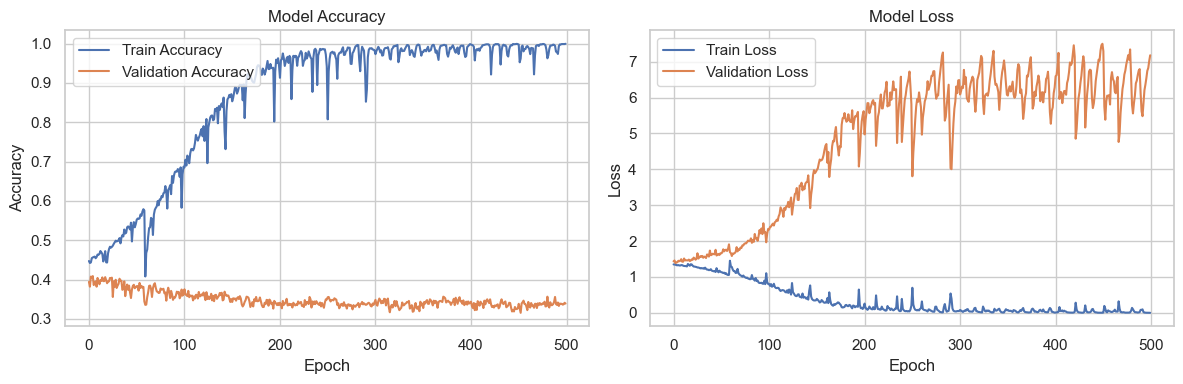

In [62]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()